In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm


## Random Forest

In [2]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'rfresult.csv'

# Read the CSV file into a DataFrame
rfdf = pd.read_csv(csv_file_path)

rfdf.head()

txtmodel = 'Random Forest'
dfp = rfdf

C:\Users\Hamid\AppData\Local\Temp\ipykernel_12684\3678286944.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


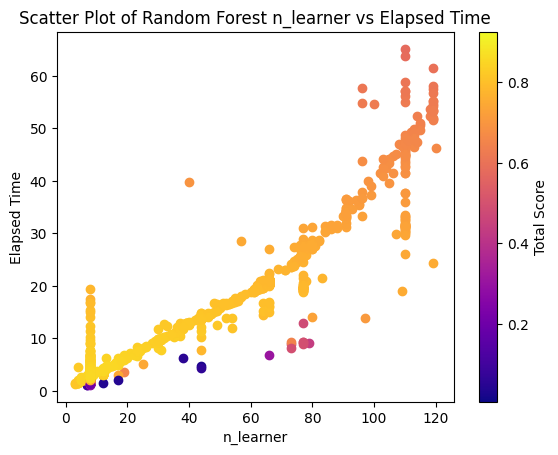

In [3]:
cmap = cm.plasma  # Choose a colormap, e.g., viridis

for index, row in dfp.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    alpha_value = row['total_score'] 

    # Plot the point for each row with alpha color
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=plt.gca())  # Specify the axis for the colorbar

# Set labels and title
plt.xlabel('n_learner')
plt.ylabel('Elapsed Time')
plt.title(f"Scatter Plot of {txtmodel} n_learner vs Elapsed Time")



# Display legend
# plt.legend()

# Show the plot
plt.show()

C:\Users\Hamid\AppData\Local\Temp\ipykernel_12684\2736203341.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


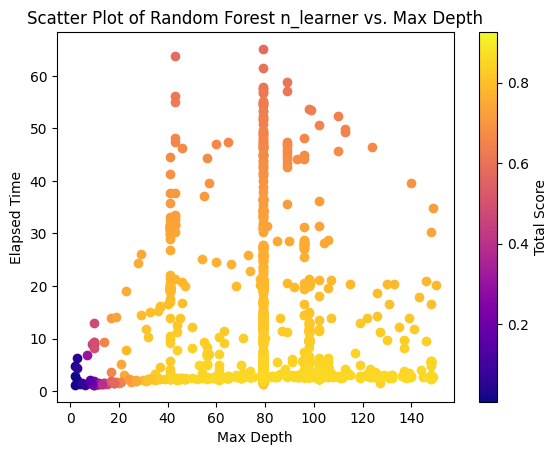

In [4]:
# Iterate through each row and create a scatter plot
for index, row in dfp.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    alpha_value = row['total_score'] 
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=plt.gca())  # Specify the axis for the colorbar

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Elapsed Time')
plt.title(f'Scatter Plot of {txtmodel} n_learner vs. Max Depth')

# Display legend
# plt.legend()

# Show the plot
plt.show()


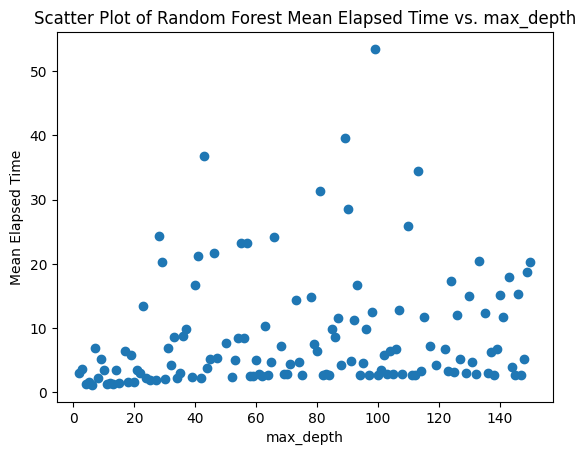

In [5]:
# Group by 'max_depth' and calculate the mean of 'elapsed_time'
mean_elapsed_time = dfp.groupby('max_depth')['elapsed_time'].mean().reset_index()

# Scatter plot of mean_elapsed_time vs max_depth
plt.scatter(mean_elapsed_time['max_depth'], mean_elapsed_time['elapsed_time'])

# Set labels and title
plt.xlabel('max_depth')
plt.ylabel('Mean Elapsed Time')
plt.title(f'Scatter Plot of {txtmodel} Mean Elapsed Time vs. max_depth')

# Show the plot
plt.show()

### Telorated plot

#### Telorance = -2%

In [6]:
Telorance = -2
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 79.0, 8.0, 0.925384486486183
[106.0, 13.0, 0.9426558249483016, 6.287550687789917, 0.911218071509352], -1.53% Tolerance
[148.0, 7.0, 0.935217797106231, 2.717315435409546, 0.9216312199291832], -0.41% Tolerance
[106.0, 13.0, 0.9426558249483016, 4.581576108932495, 0.9197479444036392], -0.61% Tolerance
[148.0, 7.0, 0.935217797106231, 3.0917270183563232, 0.9197591620144494], -0.61% Tolerance
[56.0, 23.0, 0.9437256259672814, 7.243217945098877, 0.907509536241787], -1.93% Tolerance
[56.0, 23.0, 0.9437256259672814, 6.974729537963867, 0.908851978277462], -1.79% Tolerance
[56.0, 23.0, 0.9437256259672814, 7.203214883804321, 0.9077095515482598], -1.91% Tolerance
[106.0, 13.0, 0.9426558249483016, 4.472487688064575, 0.9202933865079788], -0.55% Tolerance
[56.0, 23.0, 0.9437256259672814, 6.9735963344573975, 0.9088576442949944], -1.79% Tolerance
[148.0, 7.0, 0.935217797106231, 2.725103616714477, 0.9215922790226586], -0.41% Tolerance
[56.0, 17.0, 0.9424752487105802, 5.157909631729126, 0.9

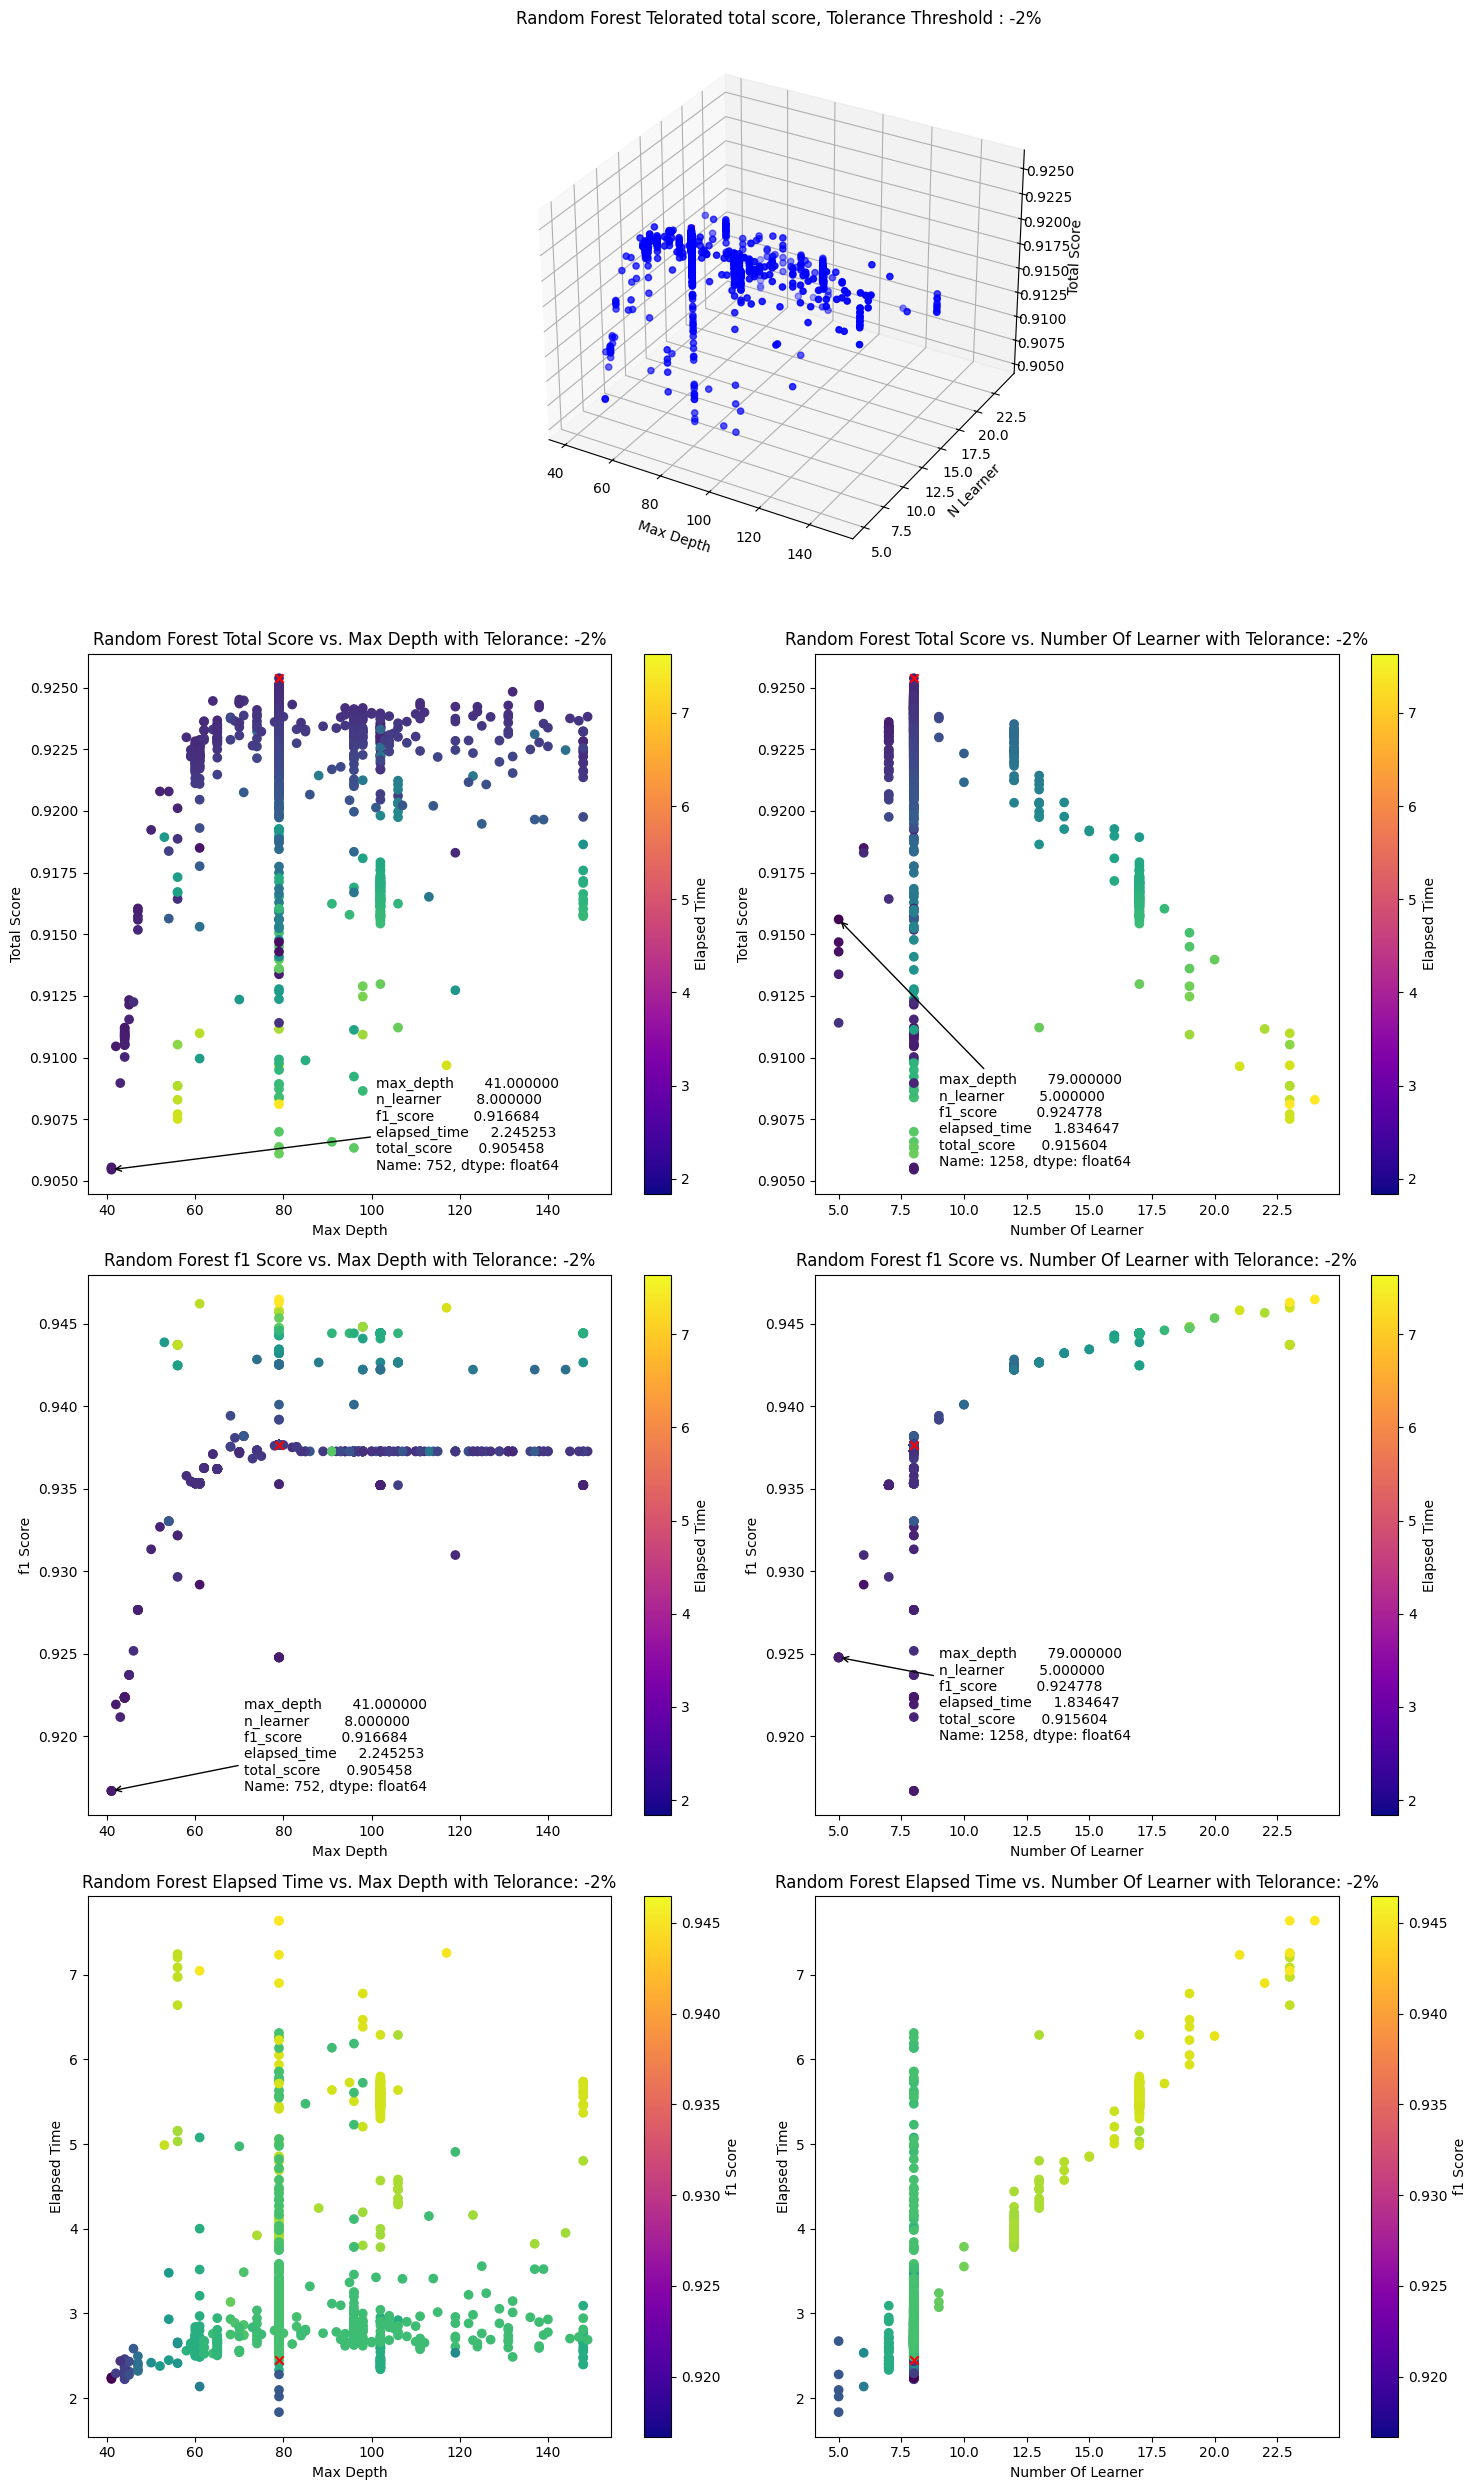

In [7]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+60, min_point_sub3['total_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+4, min_point_sub4['total_score']-0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+30, min_point_sub5['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+4, min_point_sub6['f1_score']-0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')


# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -1%

In [8]:
Telorance = -1
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 79.0, 8.0, 0.925384486486183
[148.0, 7.0, 0.935217797106231, 2.717315435409546, 0.9216312199291832], -0.41% Tolerance
[106.0, 13.0, 0.9426558249483016, 4.581576108932495, 0.9197479444036392], -0.61% Tolerance
[148.0, 7.0, 0.935217797106231, 3.0917270183563232, 0.9197591620144494], -0.61% Tolerance
[106.0, 13.0, 0.9426558249483016, 4.472487688064575, 0.9202933865079788], -0.55% Tolerance
[148.0, 7.0, 0.935217797106231, 2.725103616714477, 0.9215922790226586], -0.41% Tolerance
[56.0, 17.0, 0.9424752487105802, 5.157909631729126, 0.9166857005519344], -0.94% Tolerance
[148.0, 13.0, 0.9426558249483016, 4.802414655685425, 0.9186437516698746], -0.73% Tolerance
[106.0, 7.0, 0.935217797106231, 2.9209325313568115, 0.9206131344494468], -0.52% Tolerance
[148.0, 7.0, 0.935217797106231, 2.5508487224578857, 0.9224635534939416], -0.32% Tolerance
[148.0, 7.0, 0.935217797106231, 2.602669477462769, 0.9222044497189172], -0.34% Tolerance
[95.0, 17.0, 0.9444252451440504, 5.726483106613159, 0.

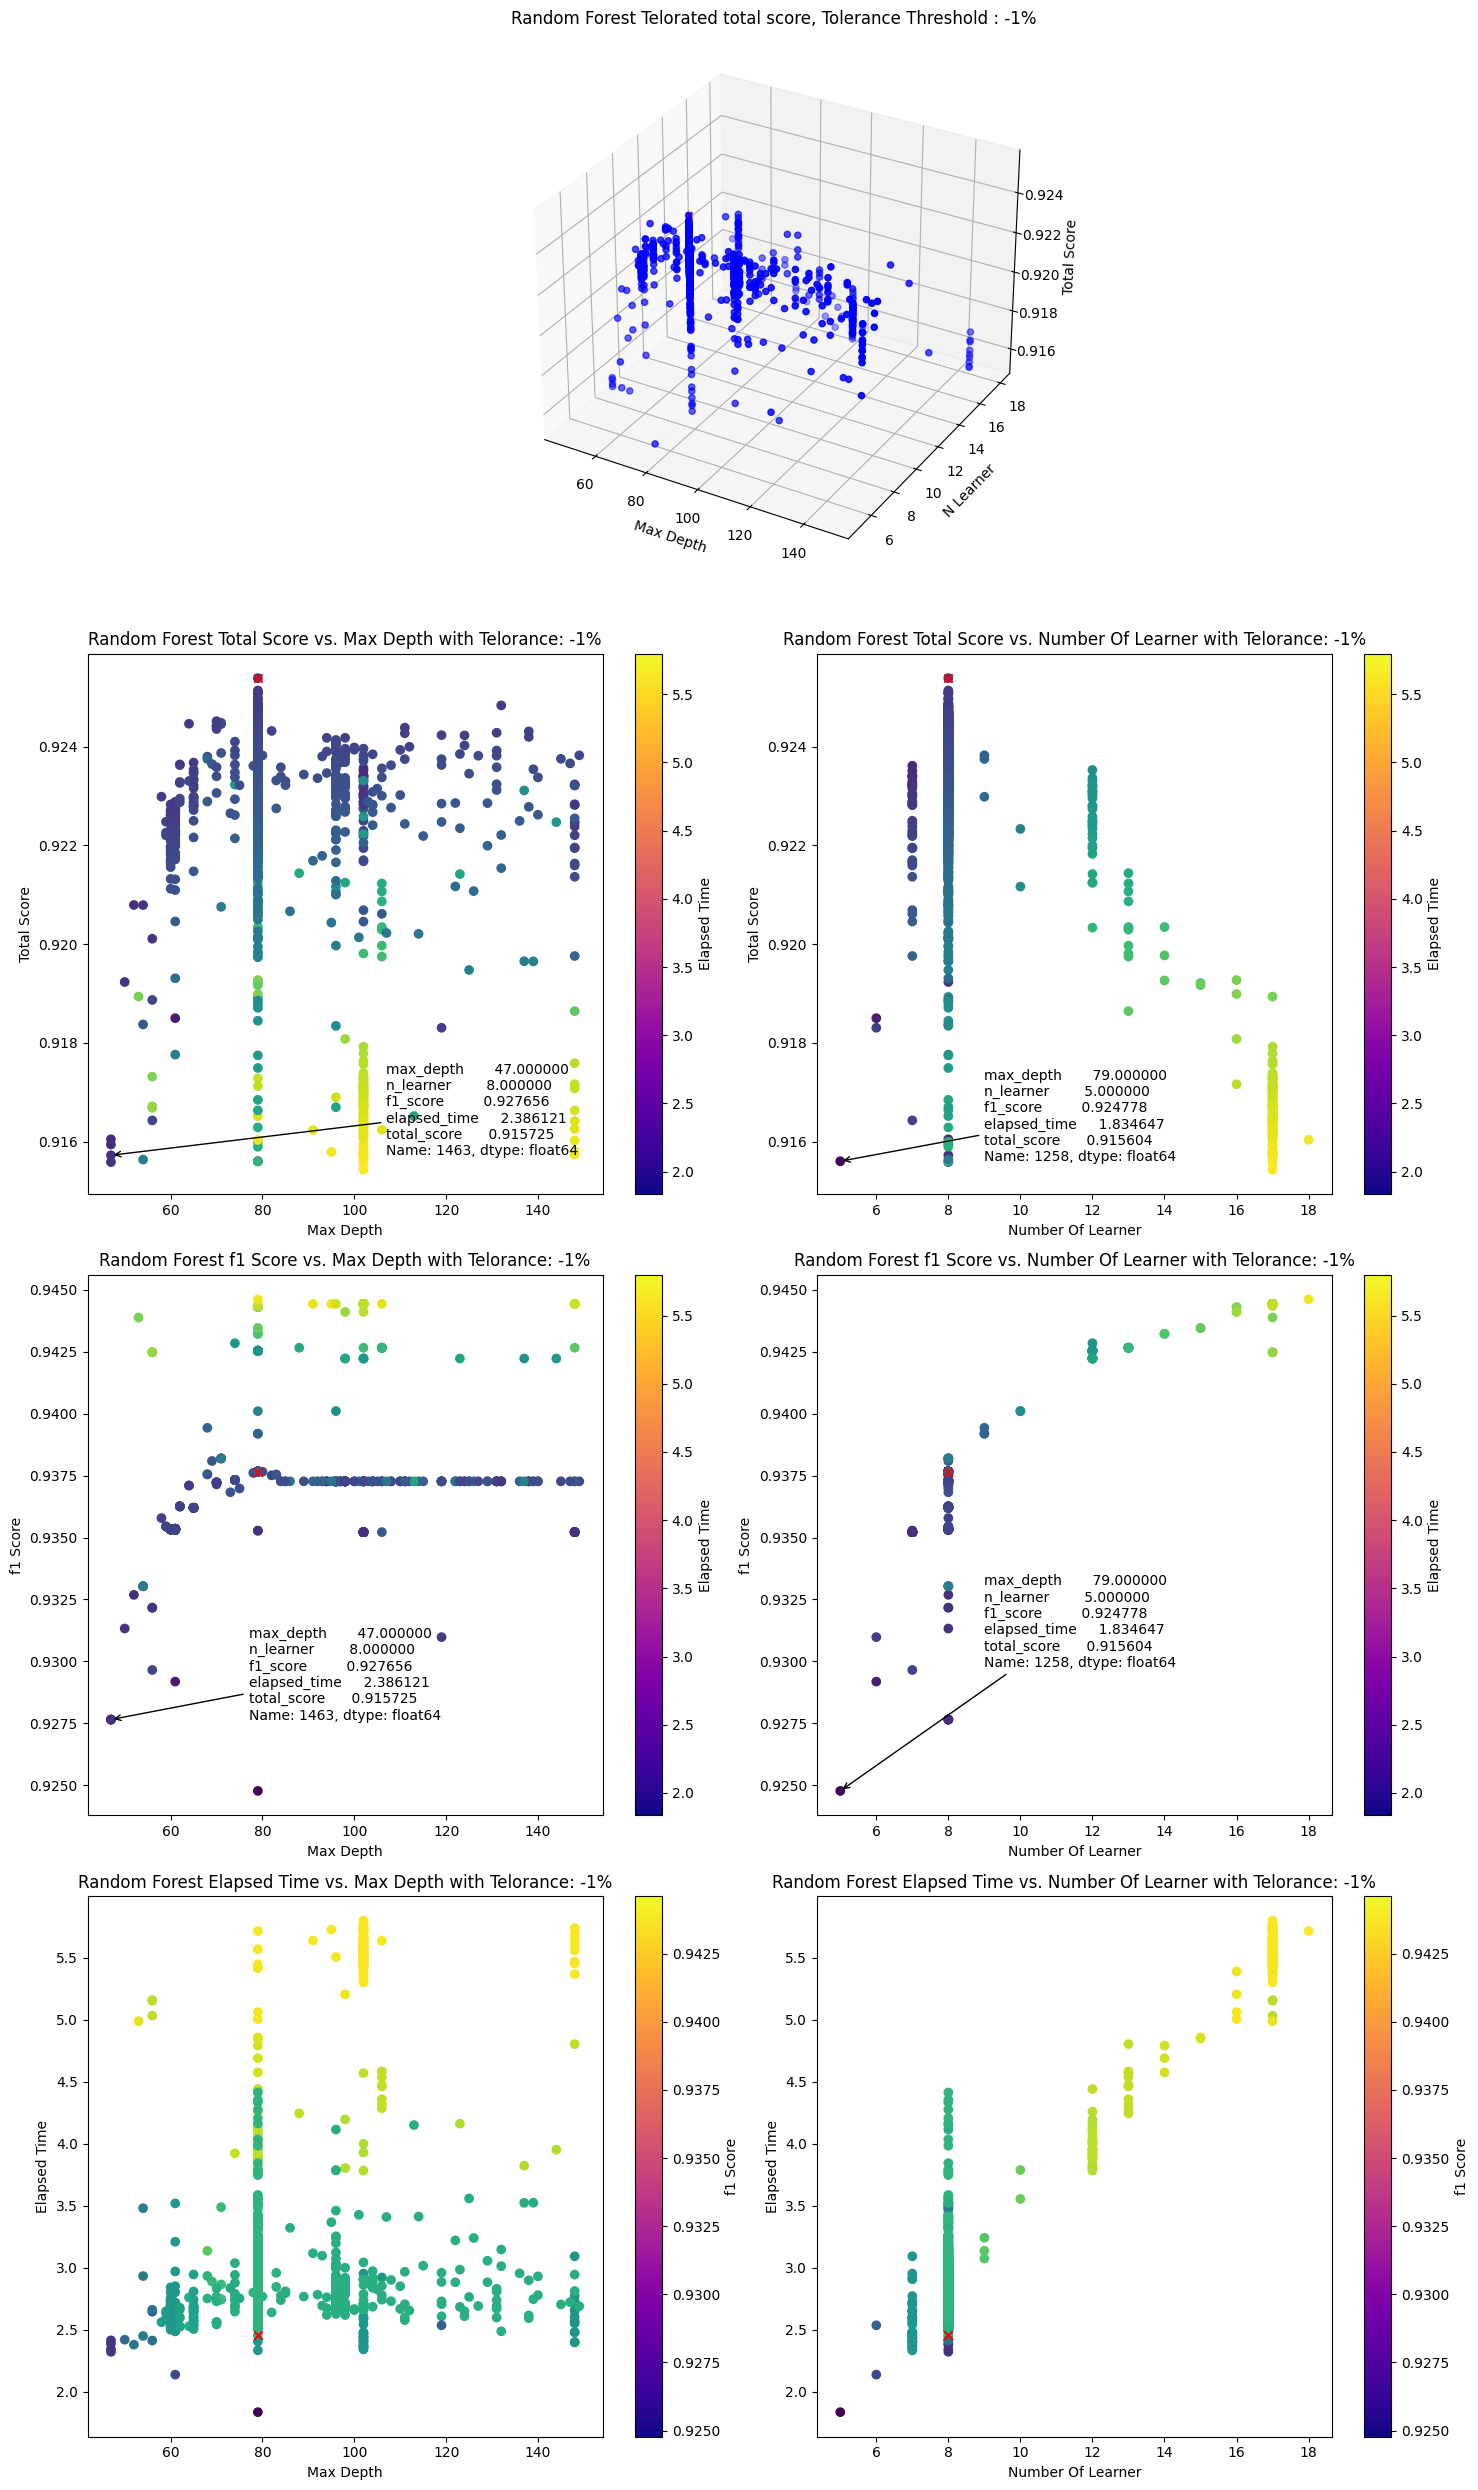

In [9]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+60, min_point_sub3['total_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+4, min_point_sub4['total_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+30, min_point_sub5['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+4, min_point_sub6['f1_score']+0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -0.5%

In [10]:
Telorance = -0.5
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 79.0, 8.0, 0.925384486486183
[148.0, 7.0, 0.935217797106231, 2.717315435409546, 0.9216312199291832], -0.41% Tolerance
[148.0, 7.0, 0.935217797106231, 2.725103616714477, 0.9215922790226586], -0.41% Tolerance
[106.0, 7.0, 0.935217797106231, 2.9209325313568115, 0.9206131344494468], -0.52% Tolerance
[148.0, 7.0, 0.935217797106231, 2.5508487224578857, 0.9224635534939416], -0.32% Tolerance
[148.0, 7.0, 0.935217797106231, 2.602669477462769, 0.9222044497189172], -0.34% Tolerance
[148.0, 7.0, 0.935217797106231, 2.7709782123565674, 0.921362906044448], -0.43% Tolerance
[148.0, 7.0, 0.935217797106231, 2.4771690368652344, 0.9228319519219048], -0.28% Tolerance
[148.0, 7.0, 0.935217797106231, 2.654916763305664, 0.9219432132897026], -0.37% Tolerance
[148.0, 7.0, 0.935217797106231, 2.6526036262512207, 0.9219547789749748], -0.37% Tolerance
[106.0, 13.0, 0.9426558249483016, 4.317841053009033, 0.9210666196832564], -0.47% Tolerance
[106.0, 13.0, 0.9426558249483016, 4.358117580413818, 0.920

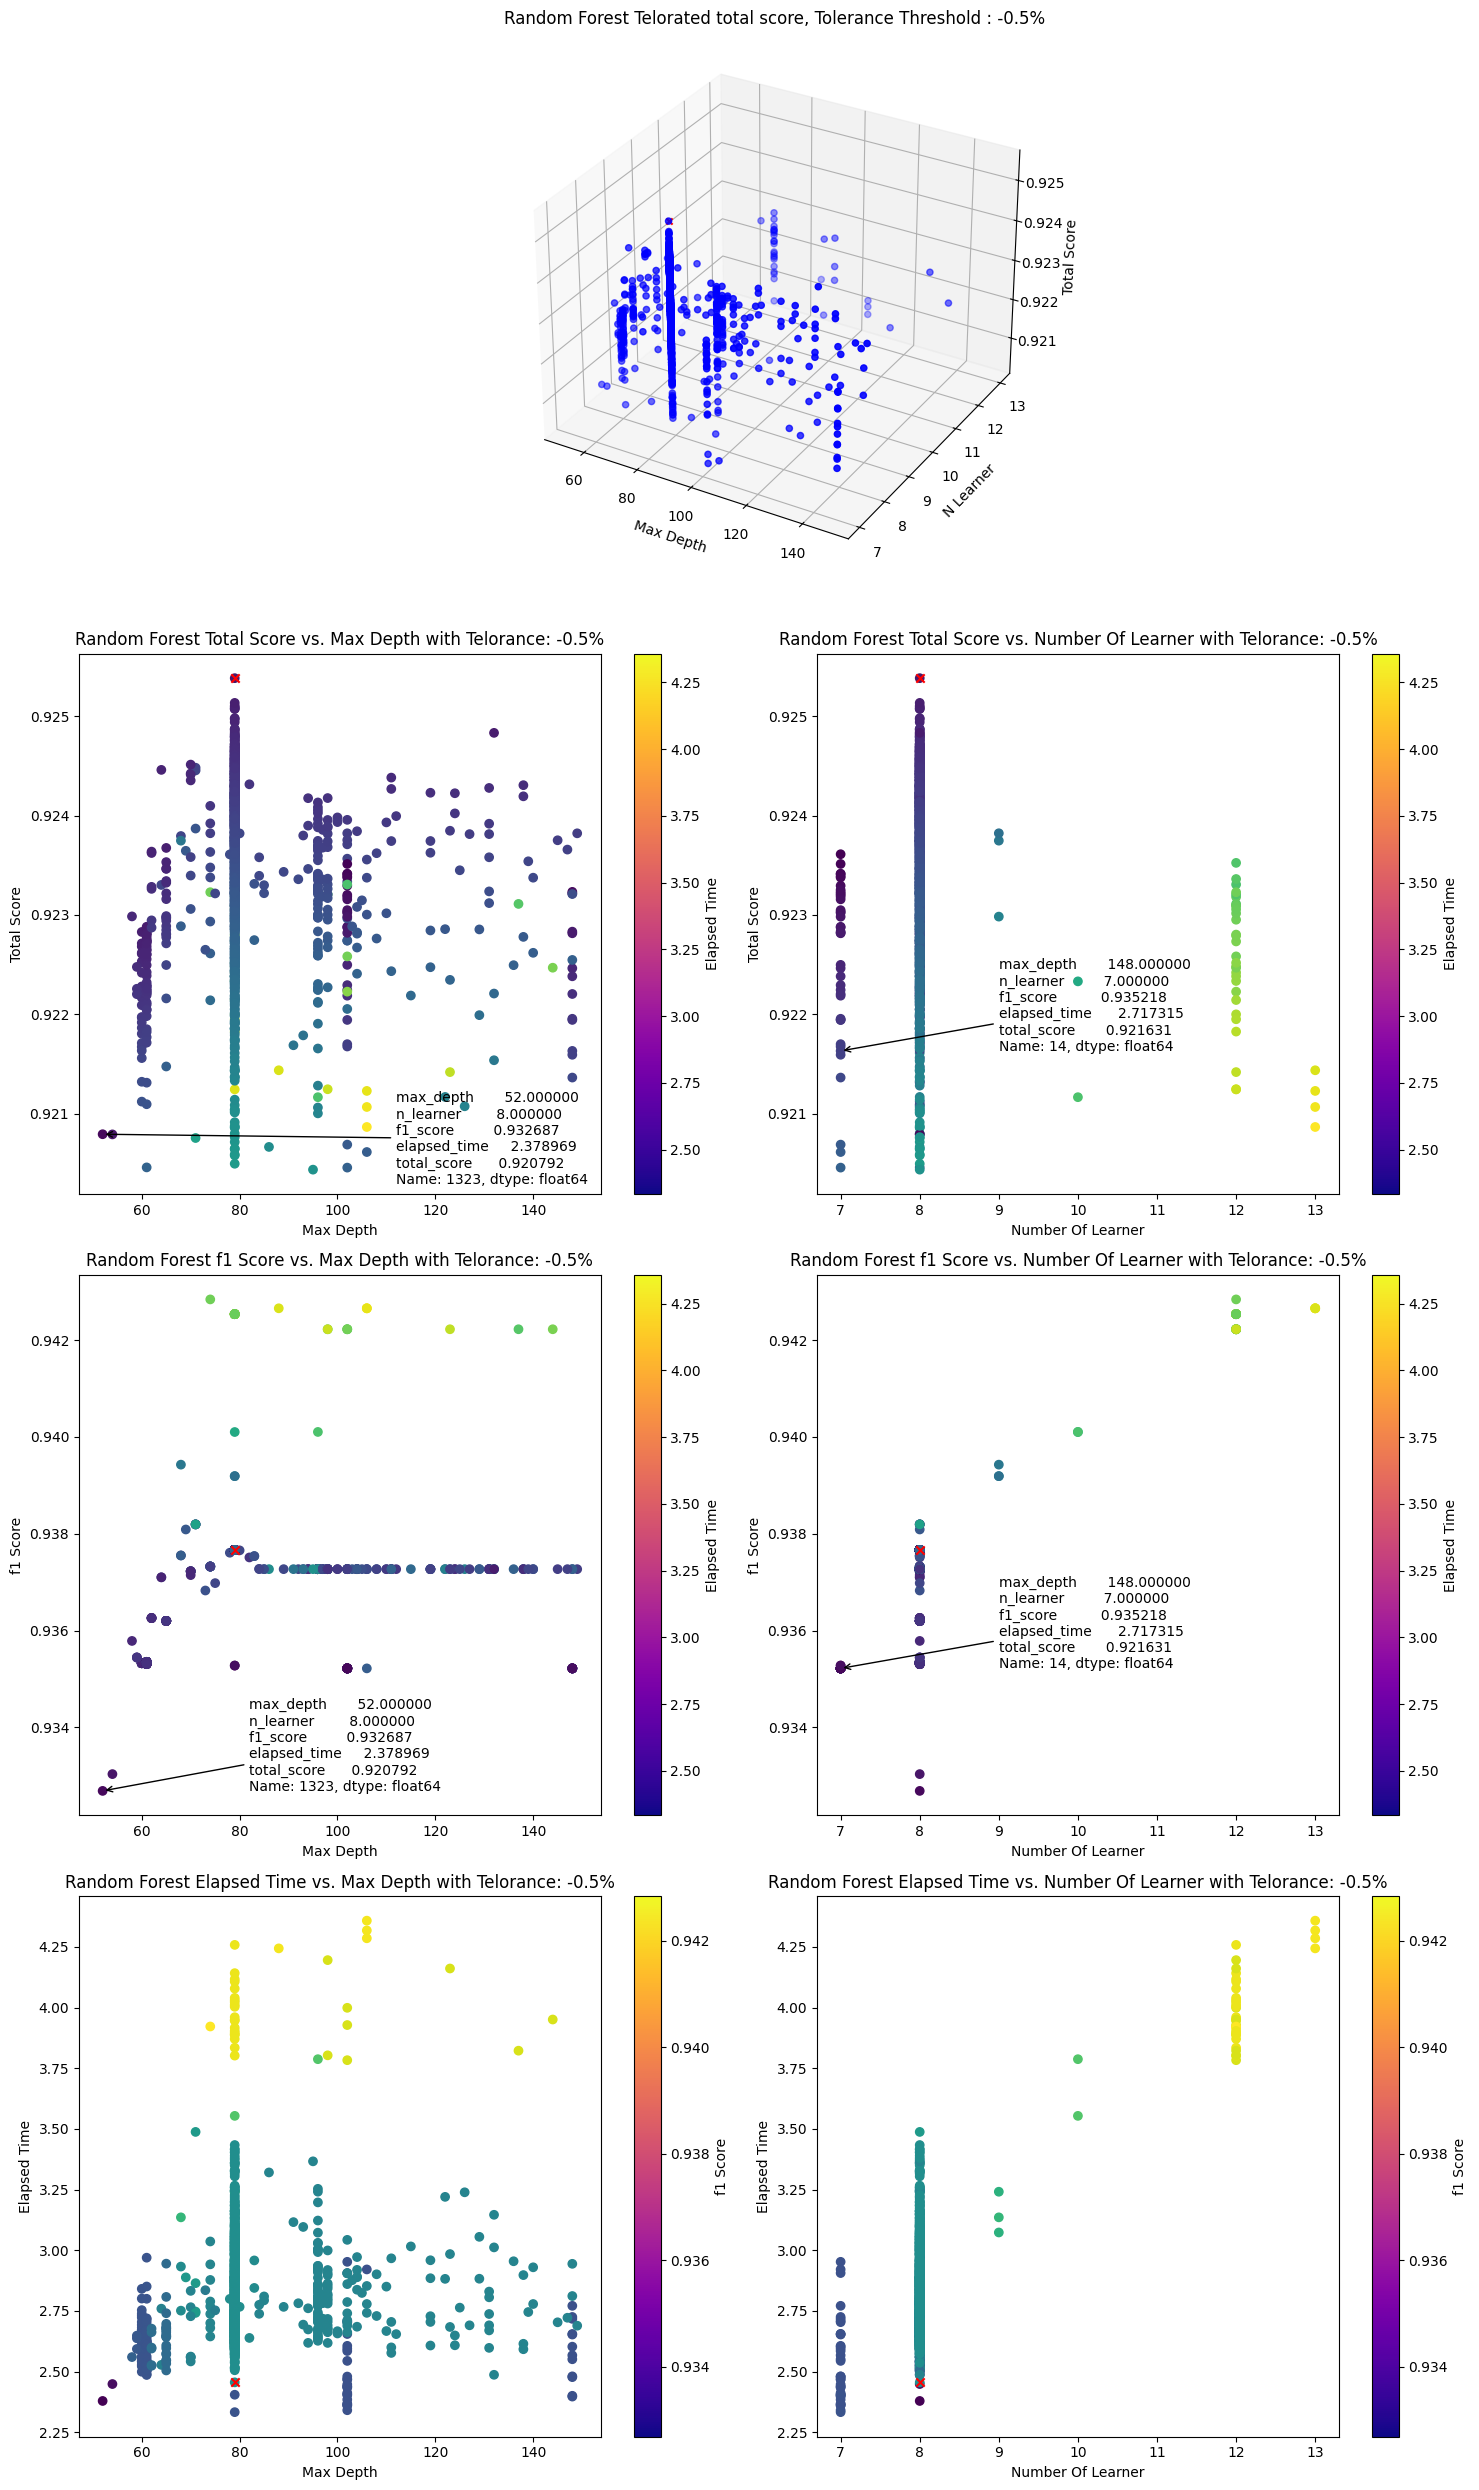

In [11]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+60, min_point_sub3['total_score']-0.0005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+2, min_point_sub4['total_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+30, min_point_sub5['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+2, min_point_sub6['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -0.1%

In [12]:
Telorance = -0.1
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 79.0, 8.0, 0.925384486486183
[79.0, 8.0, 0.9376627202527388, 2.6436586380004883, 0.9244444270627364], -0.10% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.592214584350586, 0.9247016473309858], -0.07% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.6323354244232178, 0.9245010431306226], -0.10% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.627654790878296, 0.9245244462983472], -0.09% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.6442198753356934, 0.9244416208760604], -0.10% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.6482808589935303, 0.9244213159577712], -0.10% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.6264281272888184, 0.9245305796162948], -0.09% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.650383949279785, 0.9244108005063398], -0.11% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.628403663635254, 0.9245207019345624], -0.09% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.6351451873779297, 0.9244869943158492], -0.10% Tolerance
[79.0, 8.0, 0.9376627202527388, 2.5443365573883057, 0.9249

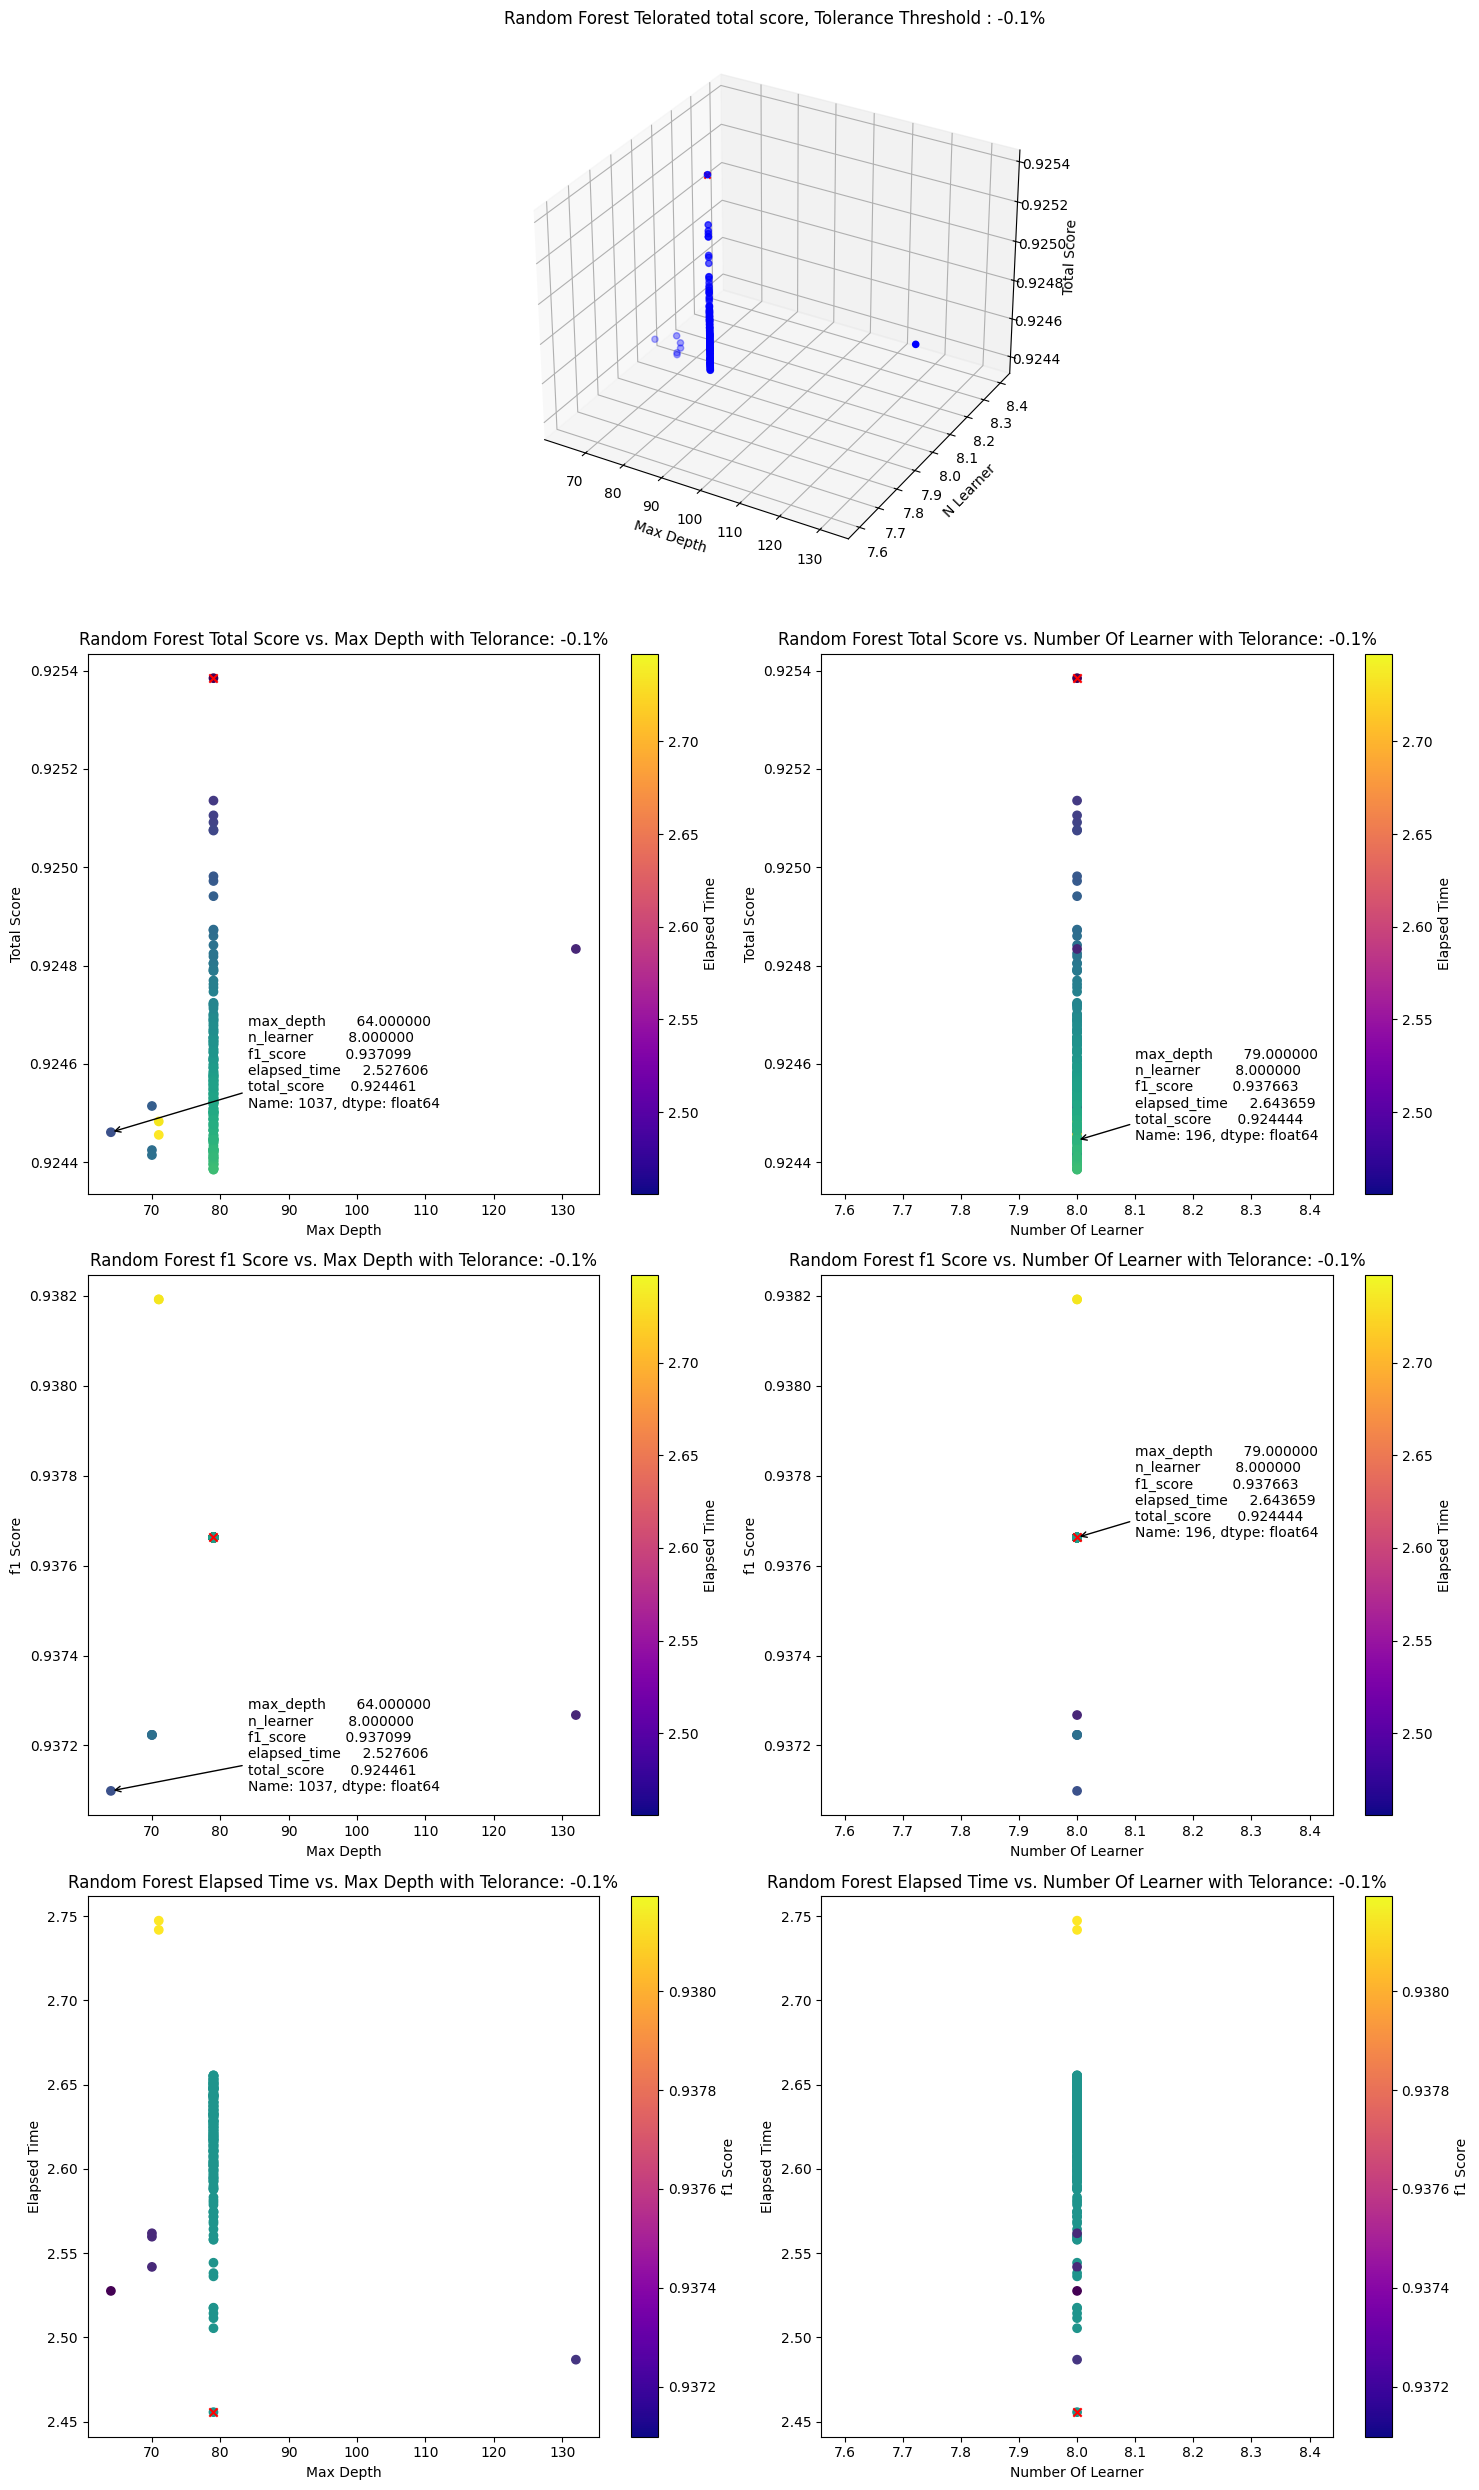

In [13]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))
cmap = cm.plasma

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+20, min_point_sub3['total_score']+0.00005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Display color bar properly
cbar.set_label('Elapsed Time')


# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+0.1, min_point_sub4['total_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+20, min_point_sub5['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+0.1, min_point_sub6['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### f1 score vs. Elapsed time

In [14]:
str(max_total_score_row)

'max_depth       79.000000\nn_learner        8.000000\nf1_score         0.937663\nelapsed_time     2.455647\ntotal_score      0.925384\nName: 1232, dtype: float64'

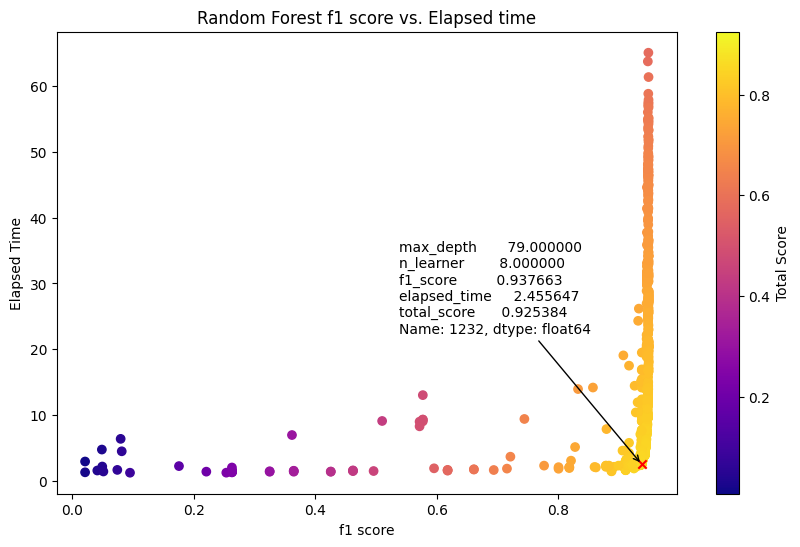

In [15]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 6))
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=2)
ax1.scatter(dfp['f1_score'], dfp['elapsed_time'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax1.scatter(max_total_score_row['f1_score'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=ax1)  # Fixed typo: 'plt.gca()' to 'ax1'

ax1.set_xlabel('f1 score')
ax1.set_ylabel('Elapsed Time')
ax1.set_title(f'{txtmodel} f1 score vs. Elapsed time')


# Label the point with the minimum max_depth
ax1.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['f1_score'], max_total_score_row['elapsed_time']),
             xytext=(max_total_score_row['f1_score']-0.4, max_total_score_row['elapsed_time']+20),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Show the plot
plt.show()

## ADABoost

In [16]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'adaresult.csv'

# Read the CSV file into a DataFrame
dfp = pd.read_csv(csv_file_path)

dfp.head()

txtmodel = 'ADABoost'

C:\Users\Hamid\AppData\Local\Temp\ipykernel_12684\3678286944.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


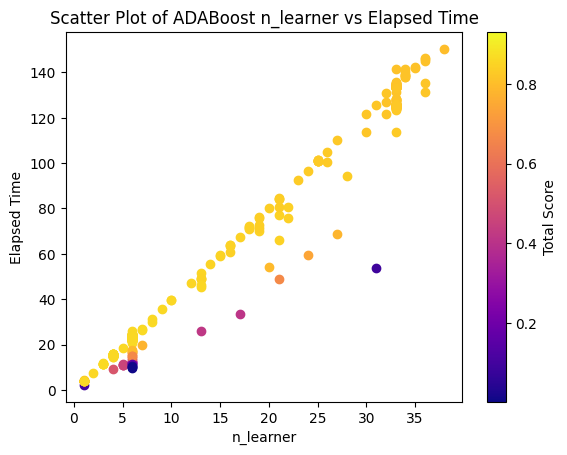

In [17]:
cmap = cm.plasma  # Choose a colormap, e.g., viridis

for index, row in dfp.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    alpha_value = row['total_score'] 

    # Plot the point for each row with alpha color
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=plt.gca())  # Specify the axis for the colorbar

# Set labels and title
plt.xlabel('n_learner')
plt.ylabel('Elapsed Time')
plt.title(f"Scatter Plot of {txtmodel} n_learner vs Elapsed Time")



# Display legend
# plt.legend()

# Show the plot
plt.show()

C:\Users\Hamid\AppData\Local\Temp\ipykernel_12684\2736203341.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


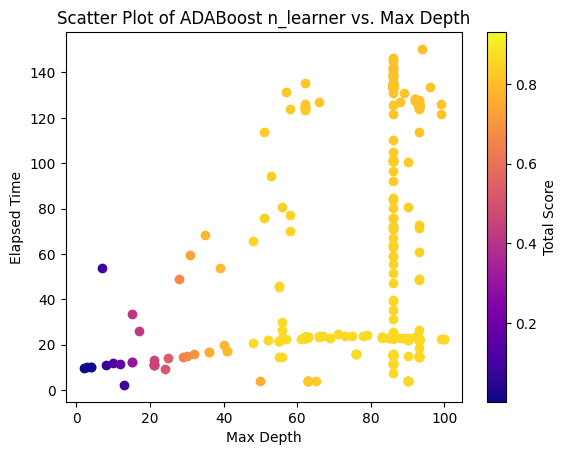

In [18]:
# Iterate through each row and create a scatter plot
for index, row in dfp.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    alpha_value = row['total_score'] 
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=plt.gca())  # Specify the axis for the colorbar

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Elapsed Time')
plt.title(f'Scatter Plot of {txtmodel} n_learner vs. Max Depth')

# Display legend
# plt.legend()

# Show the plot
plt.show()


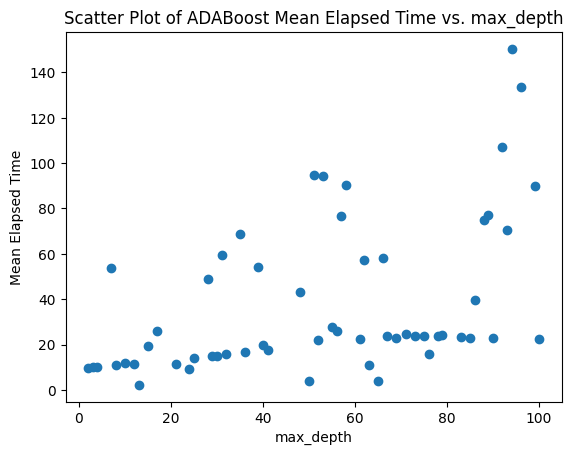

In [19]:
# Group by 'max_depth' and calculate the mean of 'elapsed_time'
mean_elapsed_time = dfp.groupby('max_depth')['elapsed_time'].mean().reset_index()

# Scatter plot of mean_elapsed_time vs max_depth
plt.scatter(mean_elapsed_time['max_depth'], mean_elapsed_time['elapsed_time'])

# Set labels and title
plt.xlabel('max_depth')
plt.ylabel('Mean Elapsed Time')
plt.title(f'Scatter Plot of {txtmodel} Mean Elapsed Time vs. max_depth')

# Show the plot
plt.show()

### Telorated plot

#### Telorance = -2%

In [20]:
Telorance = -2
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 76.0, 4.0, 0.930548258195808
[55.0, 13.0, 0.9428996130937386, 45.28650307655335, 0.920256361555462], -1.11% Tolerance
[93.0, 6.0, 0.9360032222894714, 22.10550022125244, 0.9249504721788452], -0.60% Tolerance
[86.0, 4.0, 0.9315504295522832, 15.618366956710815, 0.9237412460739278], -0.73% Tolerance
[93.0, 6.0, 0.9360032222894714, 22.05565643310547, 0.9249753940729188], -0.60% Tolerance
[55.0, 4.0, 0.9335813485775204, 14.668930768966677, 0.926246883193037], -0.46% Tolerance
[86.0, 13.0, 0.9408468905683638, 51.566892862319946, 0.915063444137204], -1.66% Tolerance
[93.0, 13.0, 0.9364688939240724, 49.12202048301697, 0.911907883682564], -2.00% Tolerance
[55.0, 6.0, 0.938513800975991, 21.63755989074707, 0.9276950210306176], -0.31% Tolerance
[93.0, 13.0, 0.9364688939240724, 48.874561071395874, 0.9120316133883744], -1.99% Tolerance
[55.0, 6.0, 0.938513800975991, 21.576991081237797, 0.927725305435372], -0.30% Tolerance
[93.0, 13.0, 0.9364688939240724, 48.678417444229126, 0.9121296

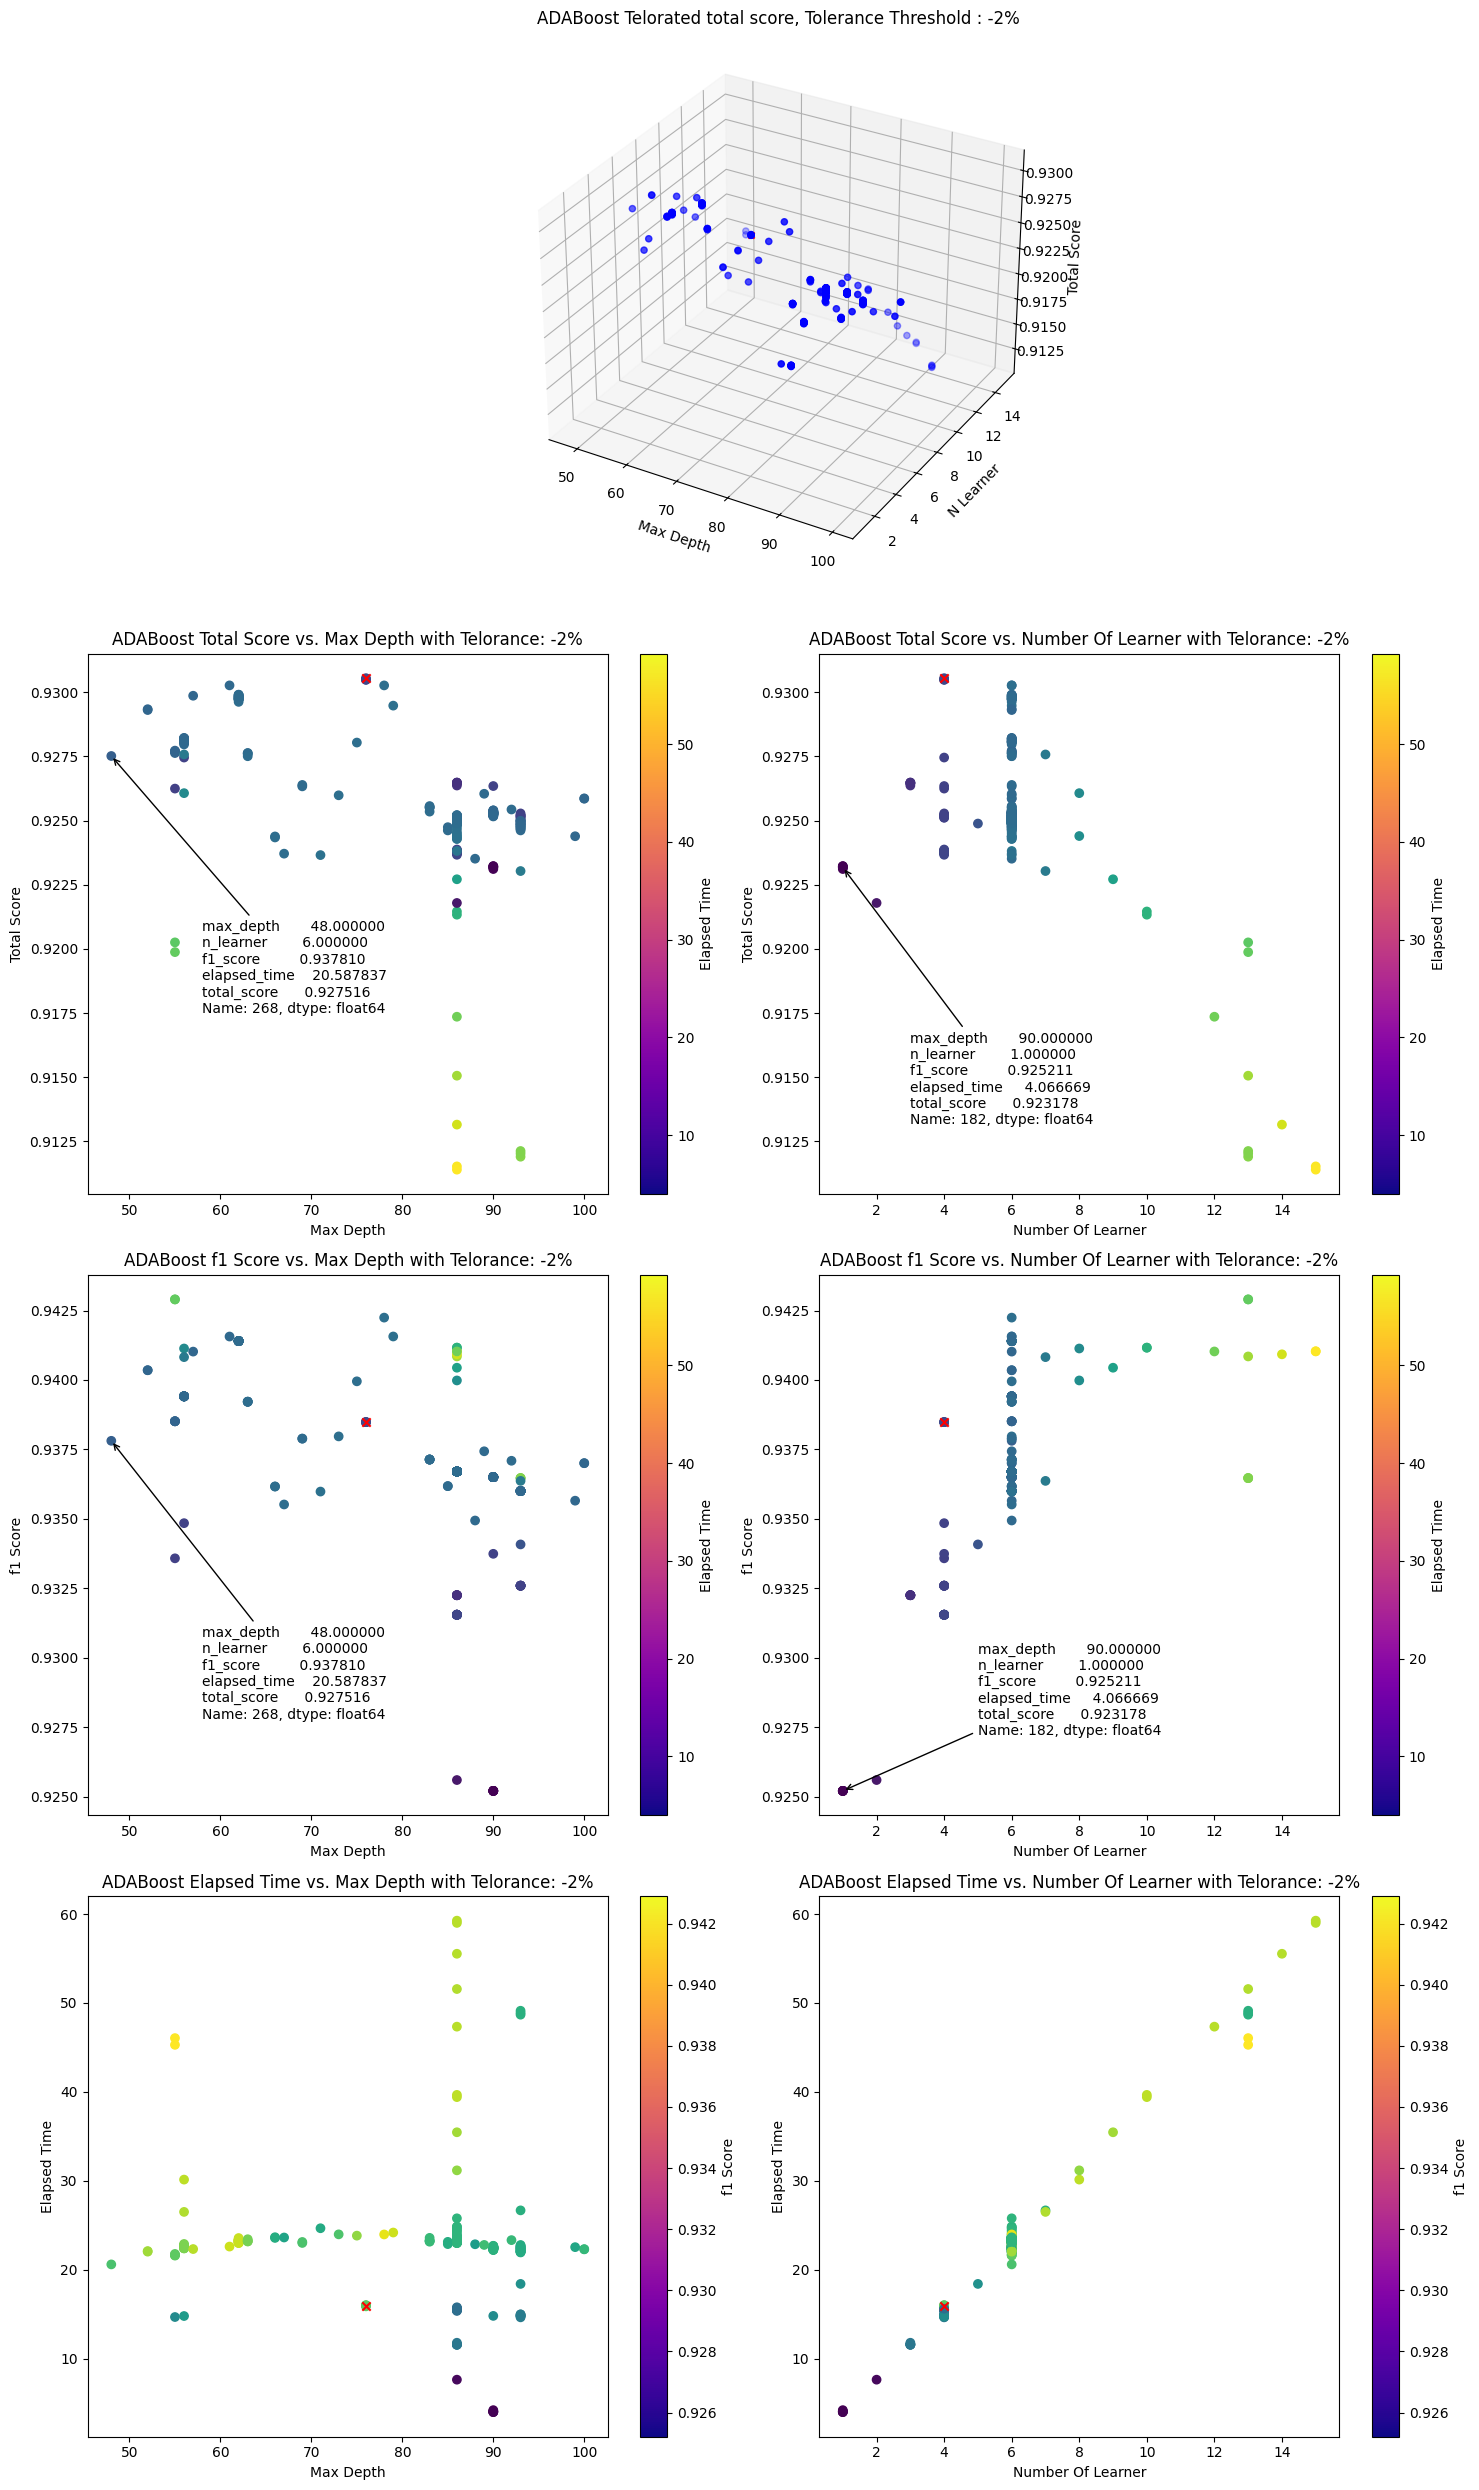

In [21]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+10, min_point_sub3['total_score']-0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+2, min_point_sub4['total_score']-0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+10, min_point_sub5['f1_score']-0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+4, min_point_sub6['f1_score']+0.002),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')


# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -1%

In [22]:
Telorance = -1
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 76.0, 4.0, 0.930548258195808
[93.0, 6.0, 0.9360032222894714, 22.10550022125244, 0.9249504721788452], -0.60% Tolerance
[86.0, 4.0, 0.9315504295522832, 15.618366956710815, 0.9237412460739278], -0.73% Tolerance
[93.0, 6.0, 0.9360032222894714, 22.05565643310547, 0.9249753940729188], -0.60% Tolerance
[55.0, 4.0, 0.9335813485775204, 14.668930768966677, 0.926246883193037], -0.46% Tolerance
[55.0, 6.0, 0.938513800975991, 21.63755989074707, 0.9276950210306176], -0.31% Tolerance
[55.0, 6.0, 0.938513800975991, 21.576991081237797, 0.927725305435372], -0.30% Tolerance
[55.0, 6.0, 0.938513800975991, 21.76525473594665, 0.9276311736080176], -0.31% Tolerance
[93.0, 6.0, 0.9360032222894714, 22.29472184181213, 0.9248558613685652], -0.61% Tolerance
[93.0, 6.0, 0.9360032222894714, 21.9736762046814, 0.9250163841871308], -0.59% Tolerance
[93.0, 6.0, 0.9360032222894714, 22.227941036224365, 0.9248892517713592], -0.61% Tolerance
[56.0, 6.0, 0.9394107105952336, 22.886847257614136, 0.927967286966

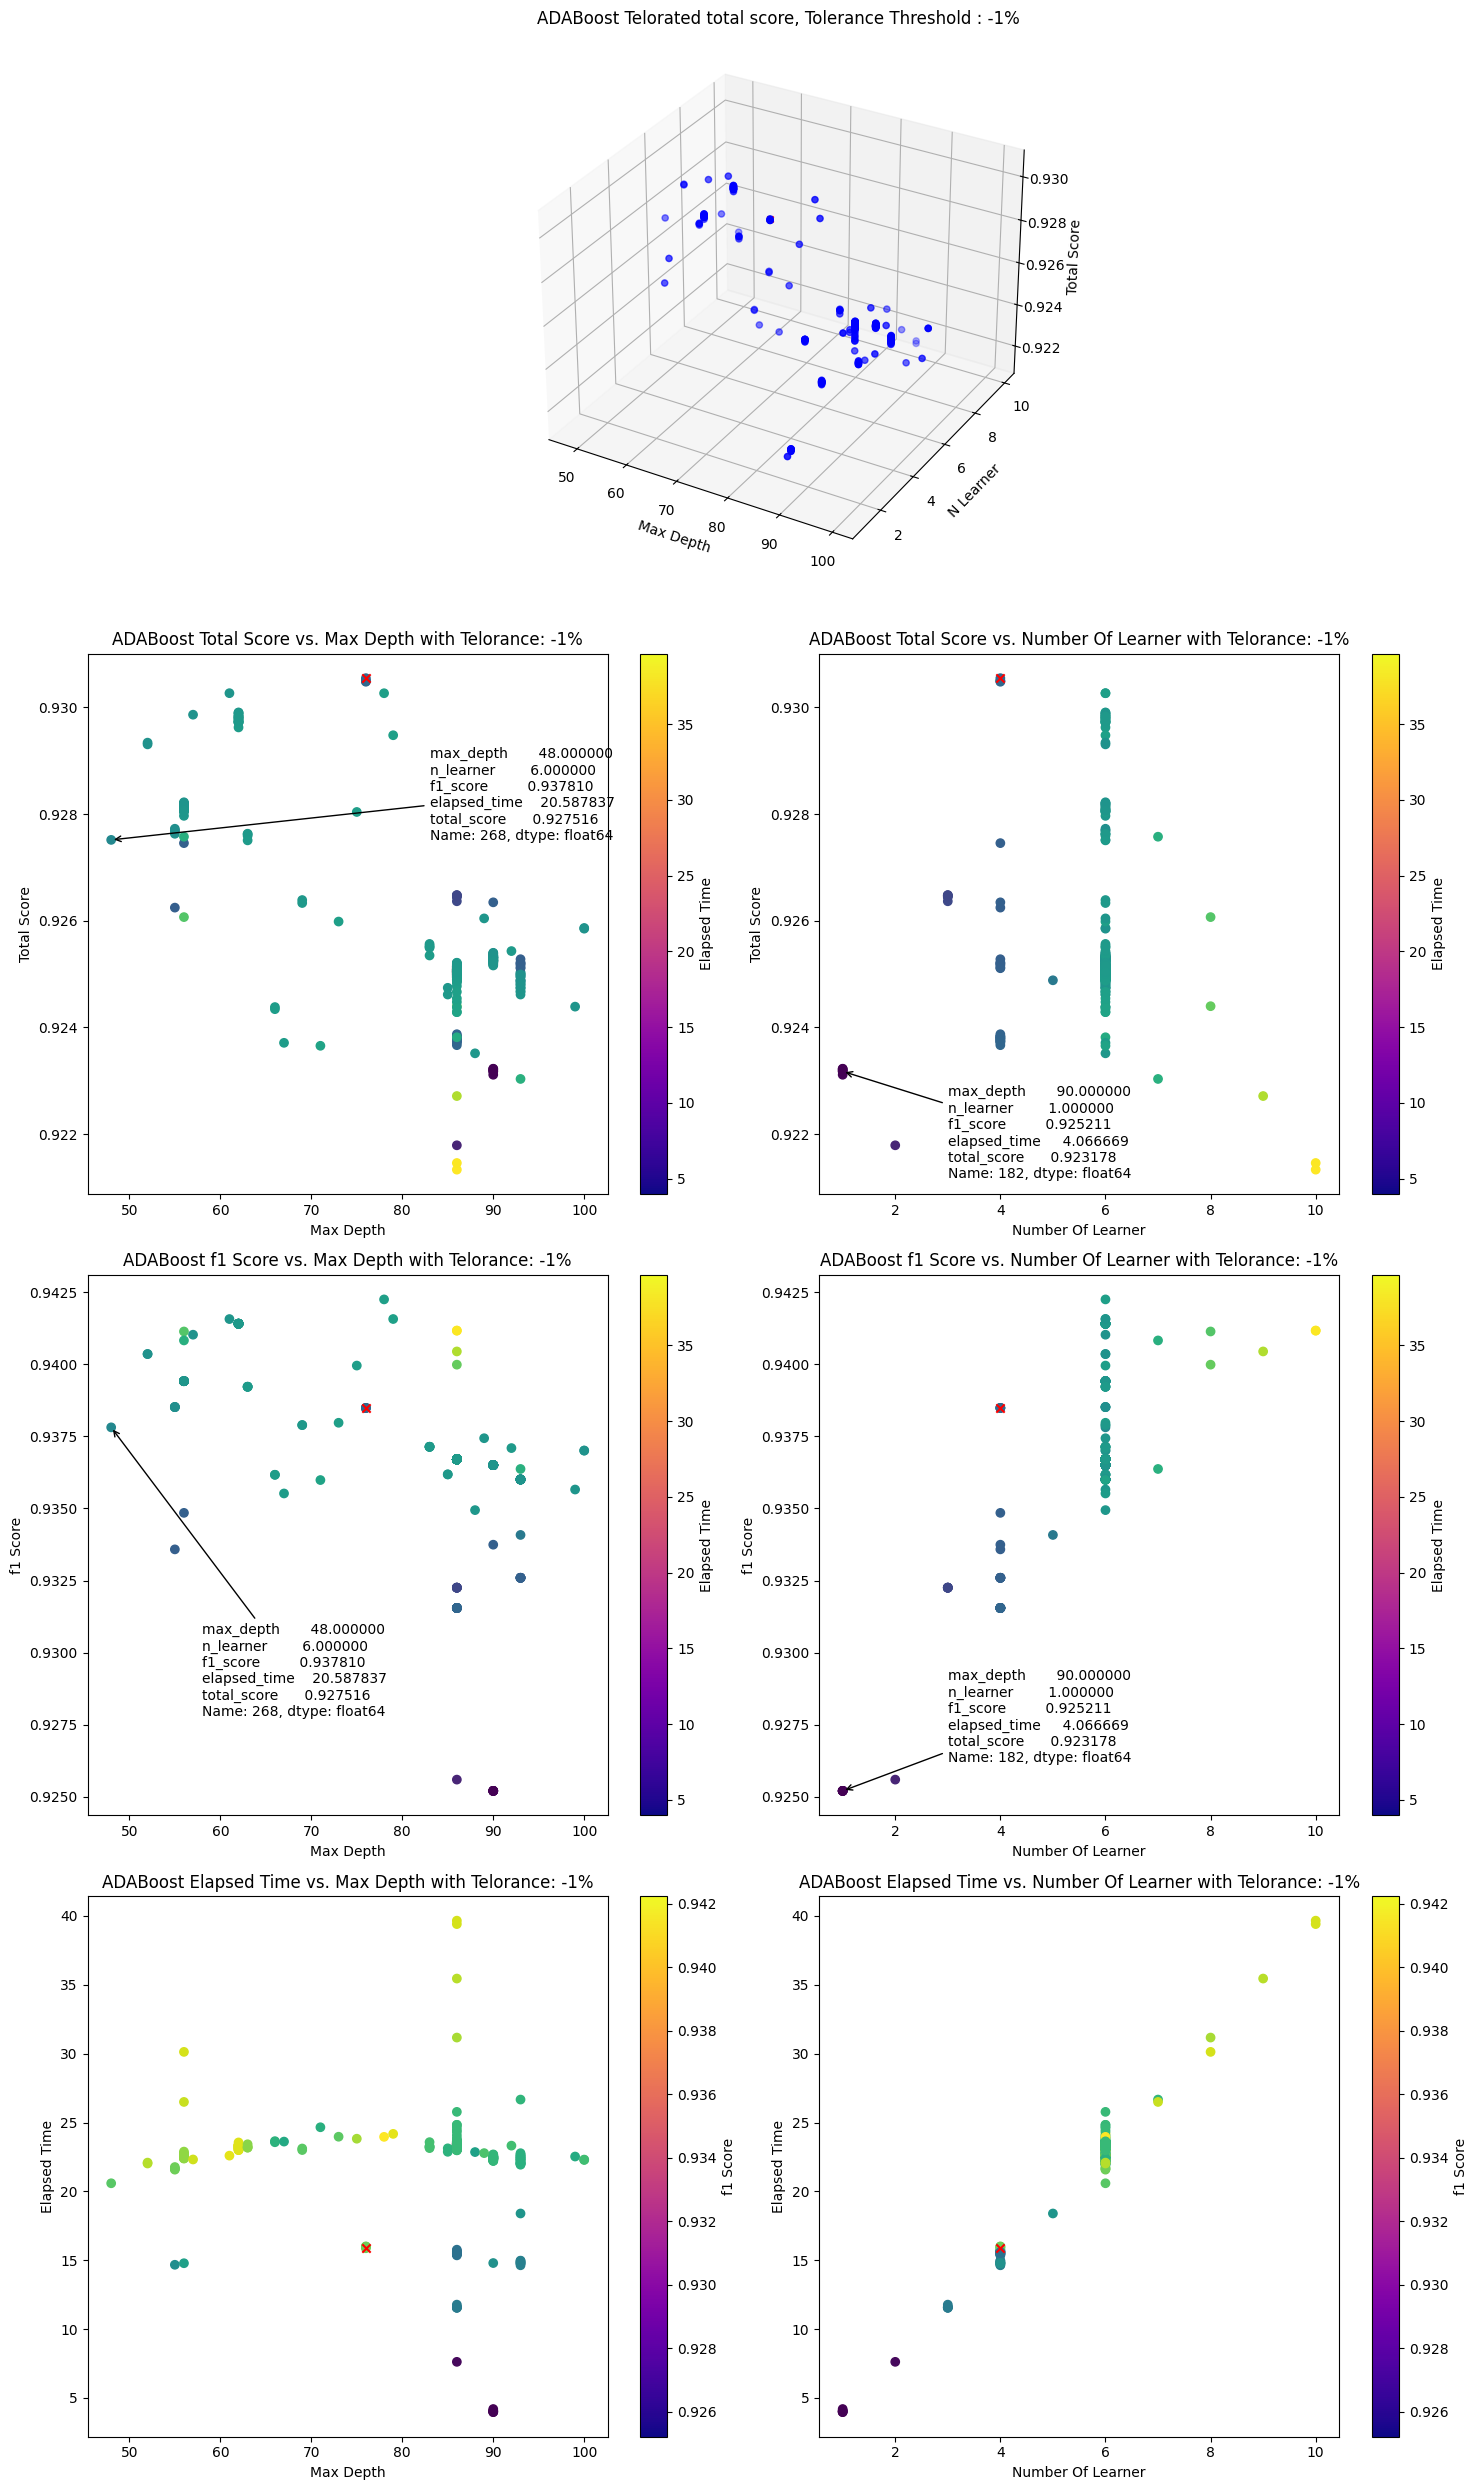

In [23]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+35, min_point_sub3['total_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+2, min_point_sub4['total_score']-0.002),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+10, min_point_sub5['f1_score']-0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+2, min_point_sub6['f1_score']+0.001),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -0.5%

In [24]:
Telorance = -0.5
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 76.0, 4.0, 0.930548258195808
[55.0, 4.0, 0.9335813485775204, 14.668930768966677, 0.926246883193037], -0.46% Tolerance
[55.0, 6.0, 0.938513800975991, 21.63755989074707, 0.9276950210306176], -0.31% Tolerance
[55.0, 6.0, 0.938513800975991, 21.576991081237797, 0.927725305435372], -0.30% Tolerance
[55.0, 6.0, 0.938513800975991, 21.76525473594665, 0.9276311736080176], -0.31% Tolerance
[56.0, 6.0, 0.9394107105952336, 22.886847257614136, 0.9279672869664268], -0.28% Tolerance
[56.0, 6.0, 0.9394107105952336, 22.619450092315677, 0.928100985549076], -0.26% Tolerance
[56.0, 6.0, 0.9394107105952336, 22.37842464447021, 0.9282214982729986], -0.25% Tolerance
[56.0, 4.0, 0.9348467542385068, 14.781615495681764, 0.927455946490666], -0.33% Tolerance
[56.0, 6.0, 0.9394107105952336, 22.614959001541138, 0.9281032310944632], -0.26% Tolerance
[56.0, 6.0, 0.9394107105952336, 22.40950489044189, 0.9282059581500128], -0.25% Tolerance
[56.0, 6.0, 0.9394107105952336, 22.545336961746216, 0.92813804211

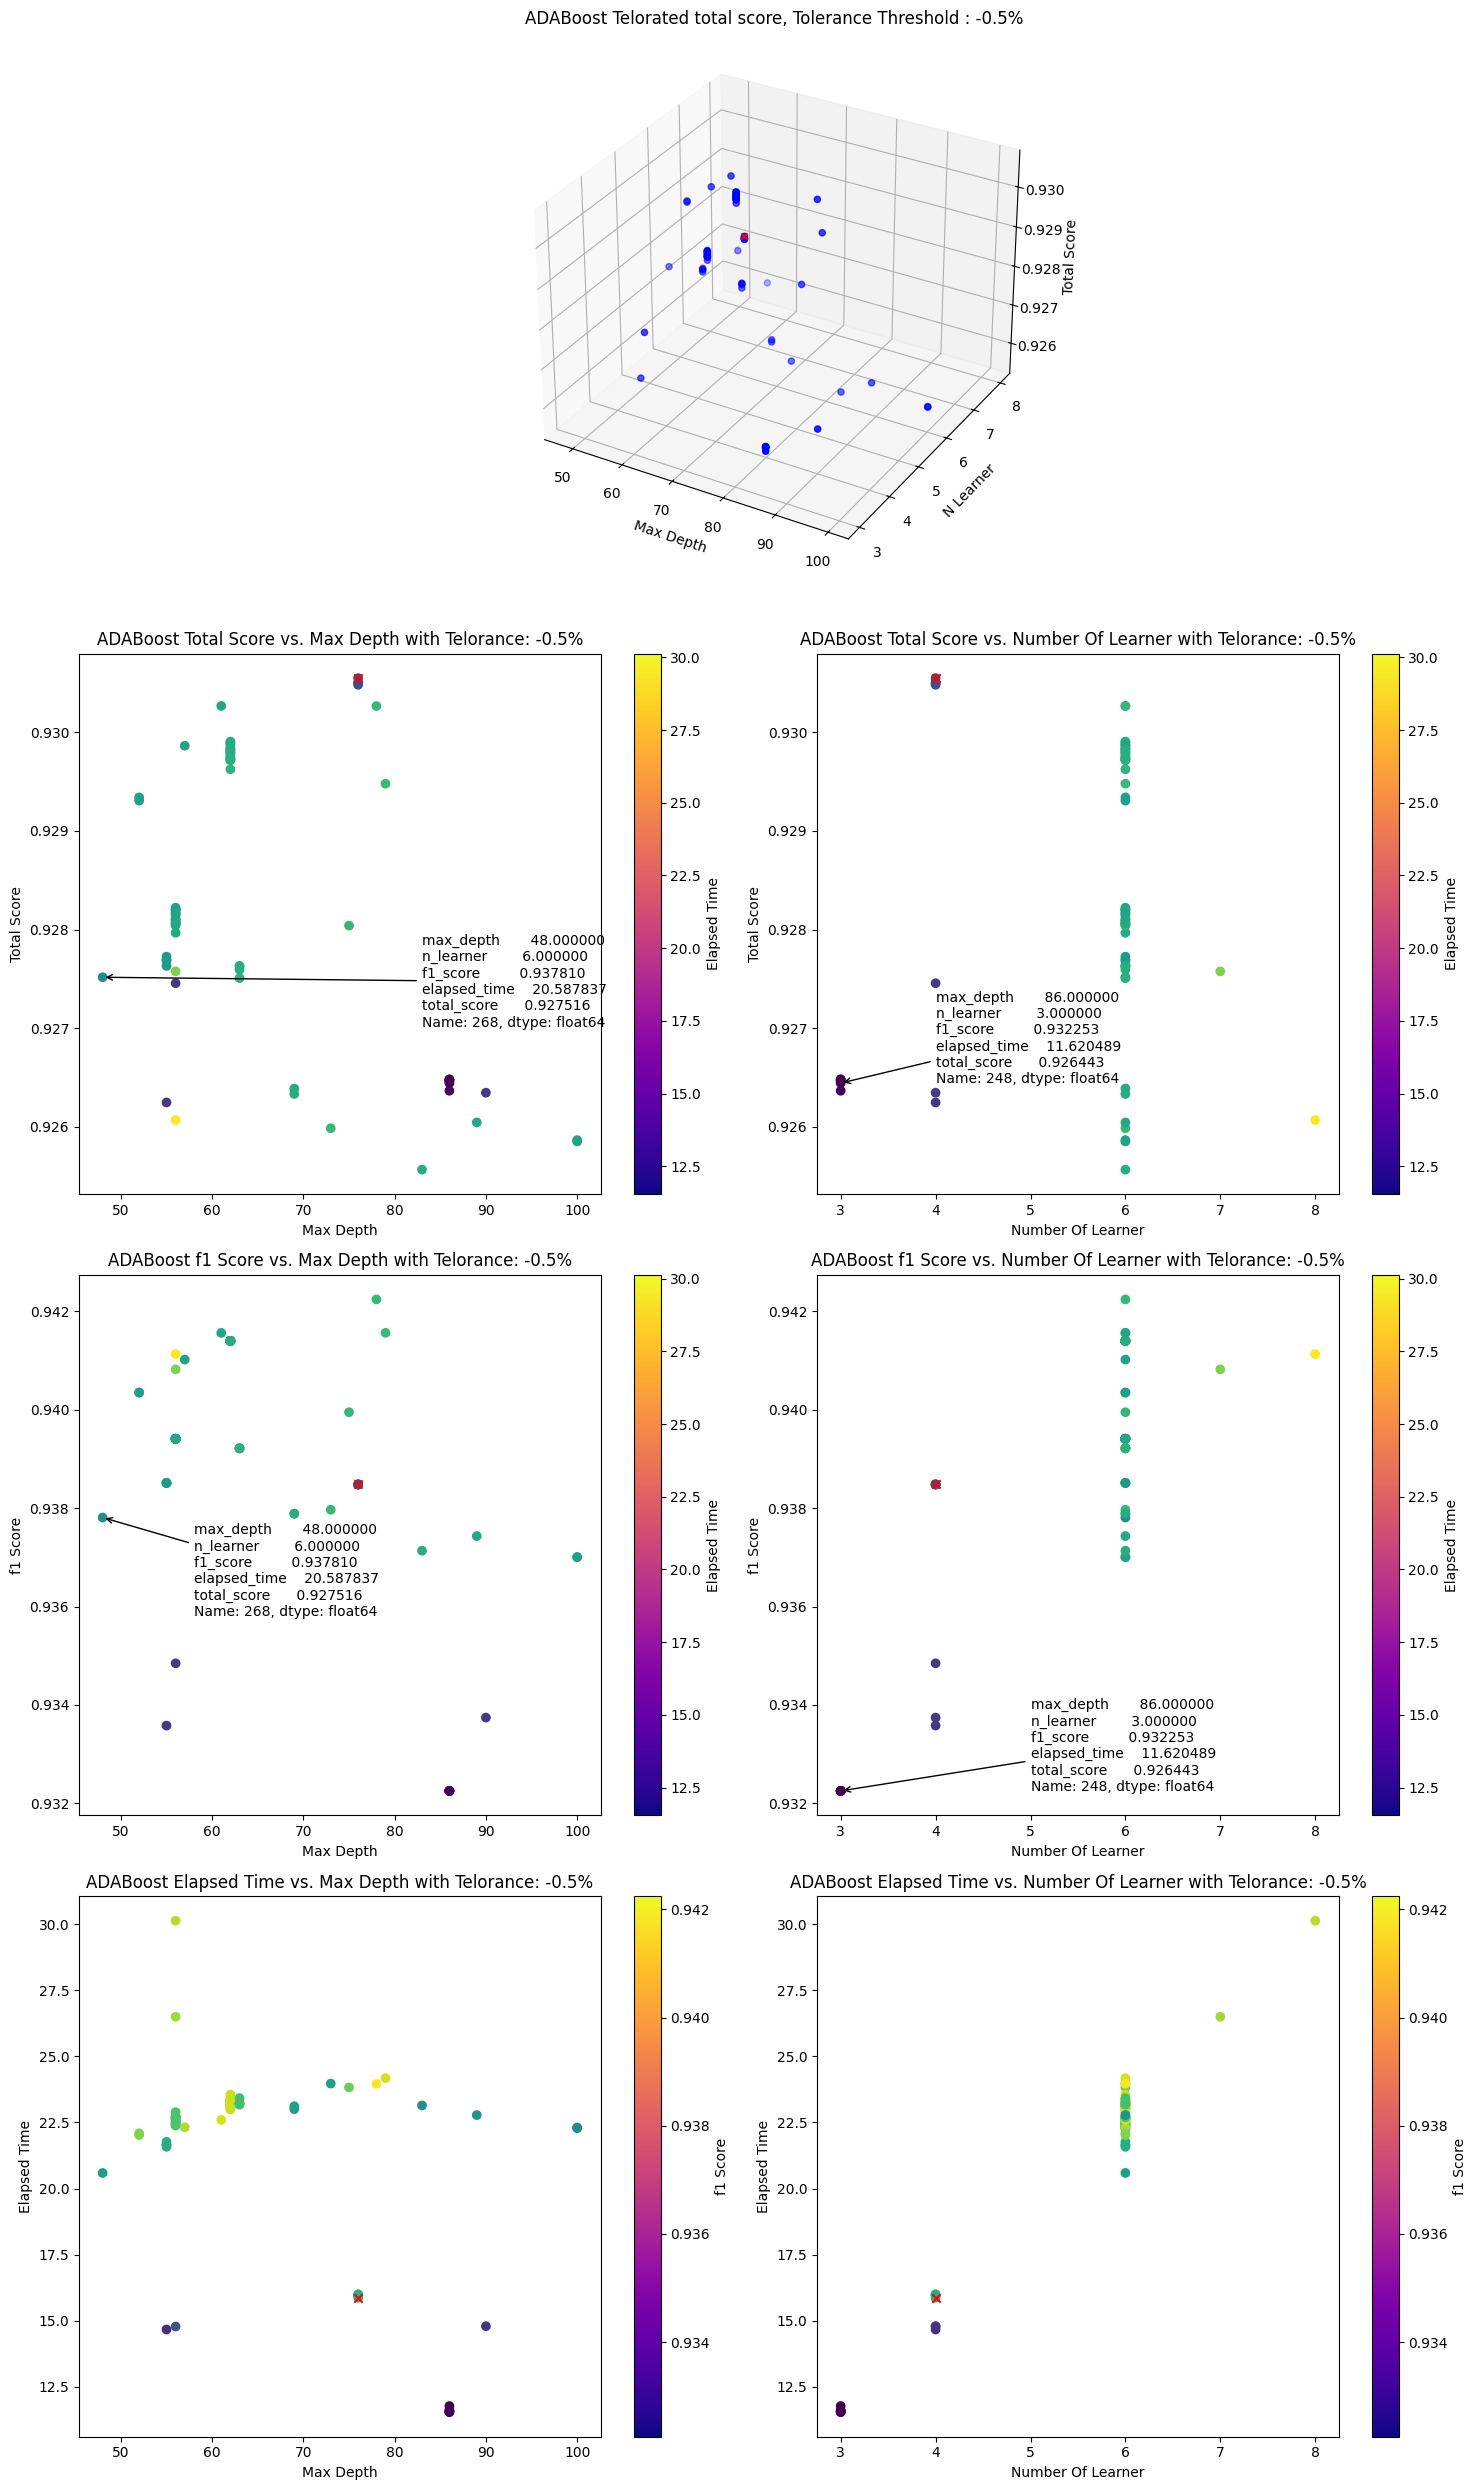

In [25]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+35, min_point_sub3['total_score']-0.0005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+1, min_point_sub4['total_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+10, min_point_sub5['f1_score']-0.002),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+2, min_point_sub6['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -0.1%

In [26]:
Telorance = -0.1
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 76.0, 4.0, 0.930548258195808
[76.0, 4.0, 0.938482983718803, 15.960078239440918, 0.9305029445990826], -0.00% Tolerance
[76.0, 4.0, 0.938482983718803, 16.00426149368286, 0.9304808529719616], -0.01% Tolerance
[76.0, 4.0, 0.938482983718803, 15.86945104598999, 0.930548258195808], 0.00% Tolerance
[76.0, 4.0, 0.938482983718803, 15.977316856384276, 0.9304943252906108], -0.01% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.552677392959595, 0.9296247155292768], -0.10% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.14918065071106, 0.929826463900401], -0.08% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.22941732406616, 0.9297863455637236], -0.08% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.36085271835327, 0.92972062786658], -0.09% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.19339251518249, 0.9298043579681652], -0.08% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.37017178535461, 0.9297159683330792], -0.09% Tolerance
[62.0, 6.0, 0.9414010542257566, 23.35503625869751, 0.9297235360964078]

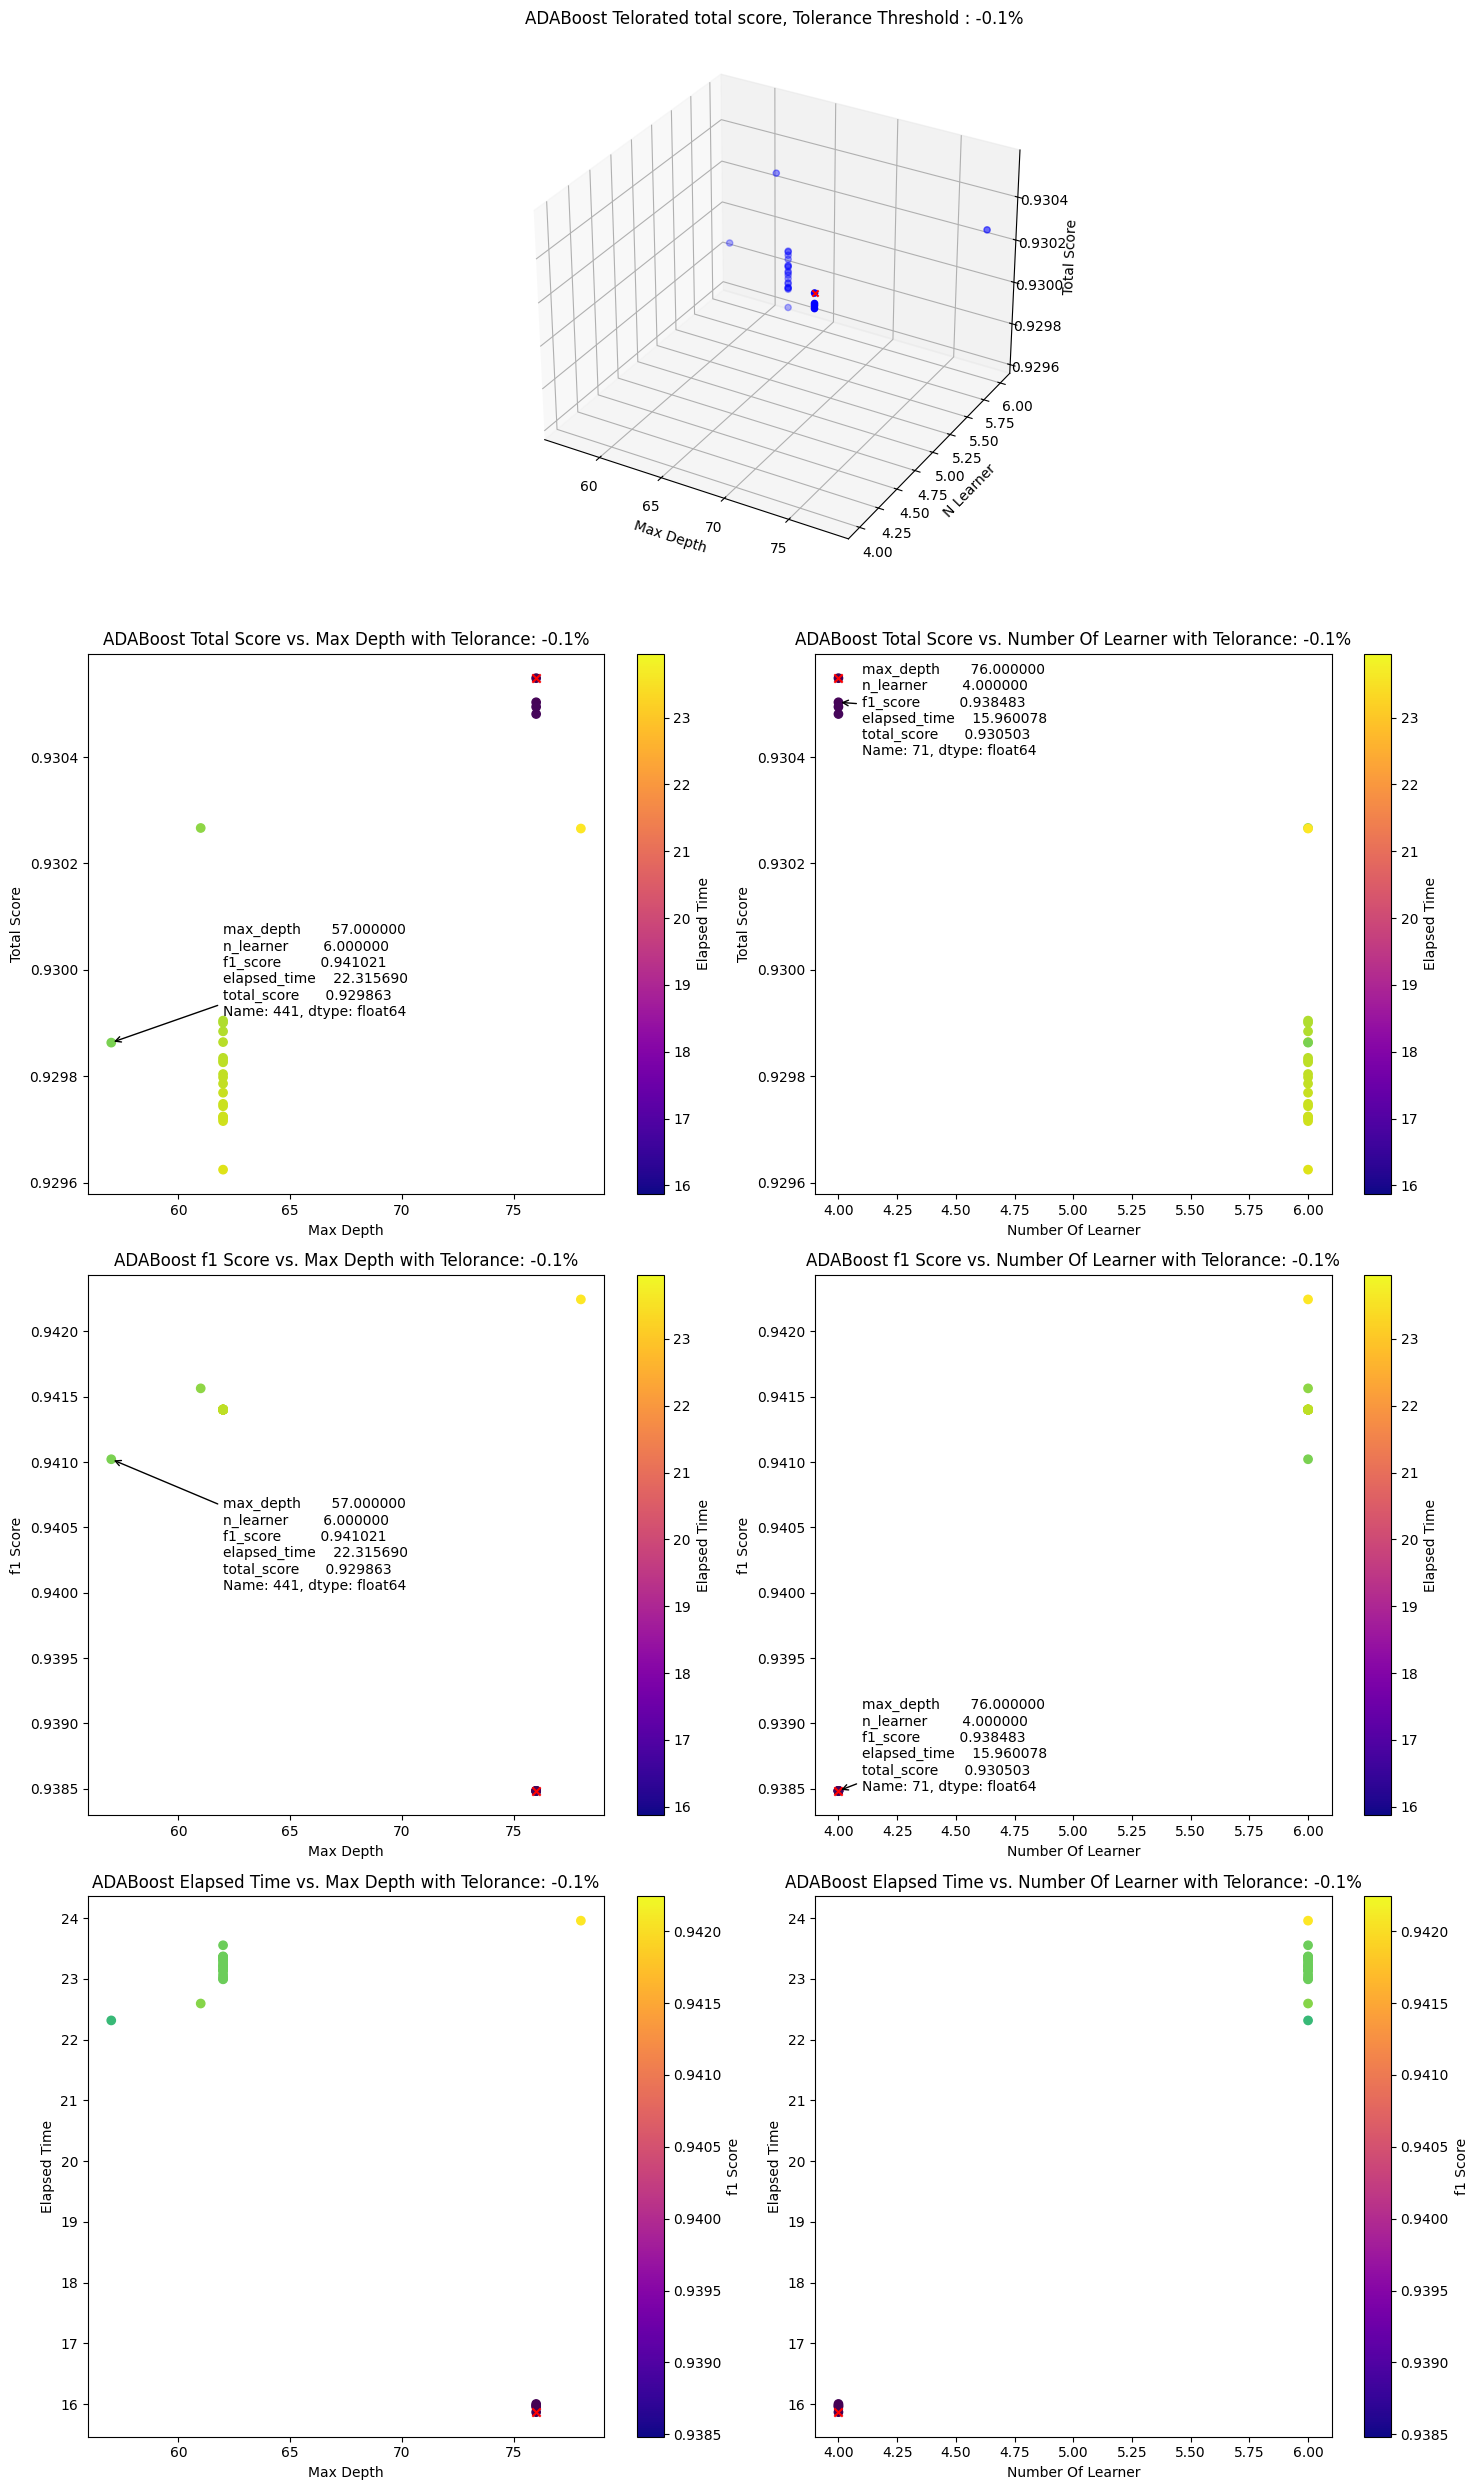

In [27]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))
cmap = cm.plasma

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+5, min_point_sub3['total_score']+0.00005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Display color bar properly
cbar.set_label('Elapsed Time')


# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+0.1, min_point_sub4['total_score']-0.0001),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+5, min_point_sub5['f1_score']-0.001),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+0.1, min_point_sub6['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### f1 score vs. Elapsed time

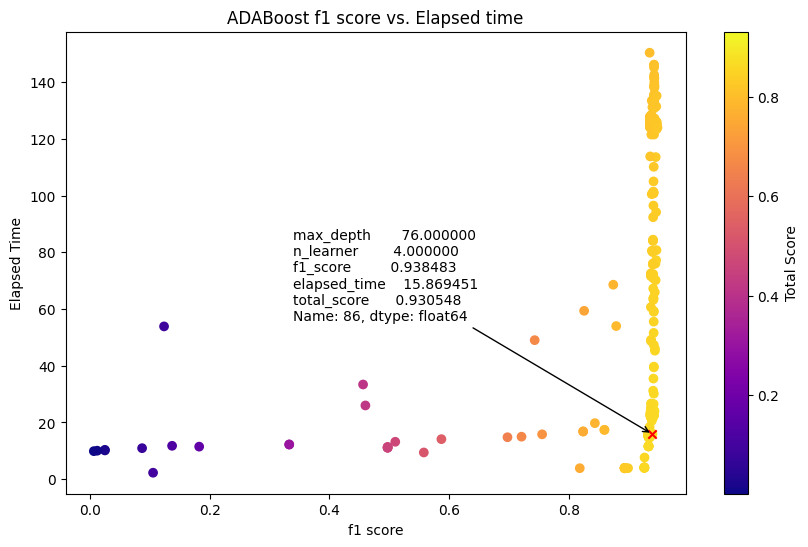

In [28]:
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score'] 


# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 6))
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=2)
ax1.scatter(dfp['f1_score'], dfp['elapsed_time'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax1.scatter(max_total_score_row['f1_score'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=ax1)  # Fixed typo: 'plt.gca()' to 'ax1'

ax1.set_xlabel('f1 score')
ax1.set_ylabel('Elapsed Time')
ax1.set_title(f'{txtmodel} f1 score vs. Elapsed time')


# Label the point with the minimum max_depth
ax1.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['f1_score'], max_total_score_row['elapsed_time']),
             xytext=(max_total_score_row['f1_score']-0.6, max_total_score_row['elapsed_time']+40),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Show the plot
plt.show()

## XGBoost

In [29]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'xgresult.csv'

# Read the CSV file into a DataFrame
dfp = pd.read_csv(csv_file_path)

dfp.head()

txtmodel = 'XGBoost'

C:\Users\Hamid\AppData\Local\Temp\ipykernel_12684\3678286944.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


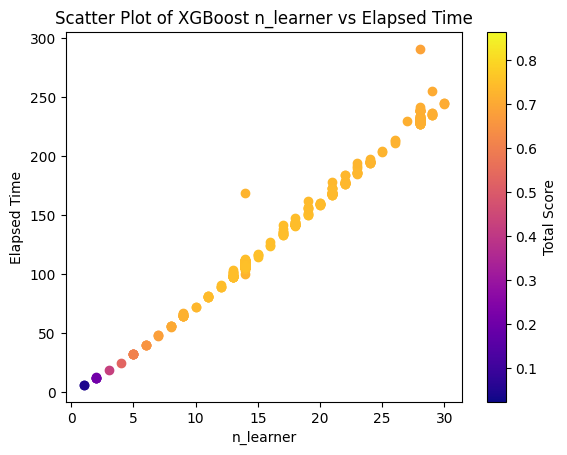

In [30]:
cmap = cm.plasma  # Choose a colormap, e.g., viridis

for index, row in dfp.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    alpha_value = row['total_score'] 

    # Plot the point for each row with alpha color
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=plt.gca())  # Specify the axis for the colorbar

# Set labels and title
plt.xlabel('n_learner')
plt.ylabel('Elapsed Time')
plt.title(f"Scatter Plot of {txtmodel} n_learner vs Elapsed Time")



# Display legend
# plt.legend()

# Show the plot
plt.show()

C:\Users\Hamid\AppData\Local\Temp\ipykernel_12684\2736203341.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


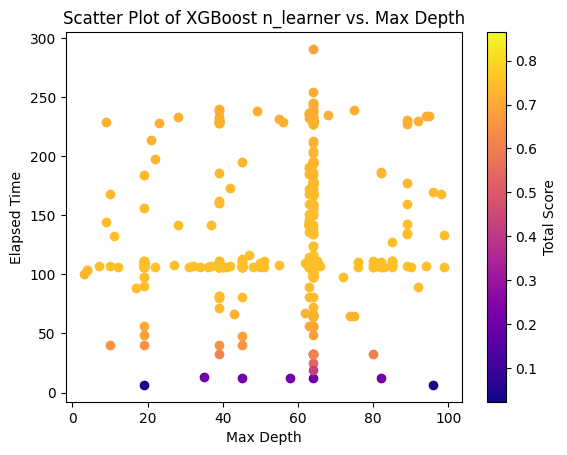

In [31]:
# Iterate through each row and create a scatter plot
for index, row in dfp.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    alpha_value = row['total_score'] 
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=plt.gca())  # Specify the axis for the colorbar

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Elapsed Time')
plt.title(f'Scatter Plot of {txtmodel} n_learner vs. Max Depth')

# Display legend
# plt.legend()

# Show the plot
plt.show()


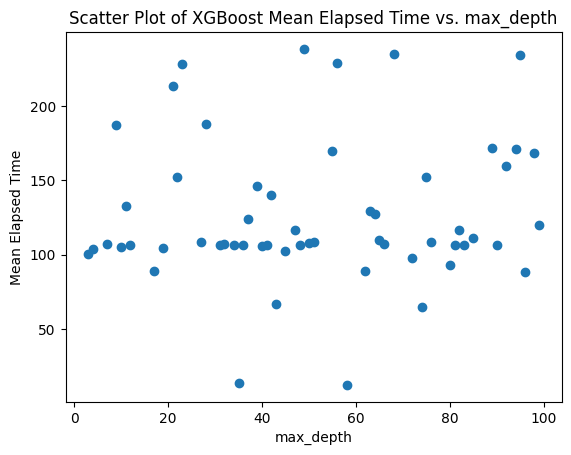

In [32]:
# Group by 'max_depth' and calculate the mean of 'elapsed_time'
mean_elapsed_time = dfp.groupby('max_depth')['elapsed_time'].mean().reset_index()

# Scatter plot of mean_elapsed_time vs max_depth
plt.scatter(mean_elapsed_time['max_depth'], mean_elapsed_time['elapsed_time'])

# Set labels and title
plt.xlabel('max_depth')
plt.ylabel('Mean Elapsed Time')
plt.title(f'Scatter Plot of {txtmodel} Mean Elapsed Time vs. max_depth')

# Show the plot
plt.show()

### Telorated plot

#### Telorance = -2%

In [33]:
Telorance = -2
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 64.0, 14.0, 0.8646199425056665
[39.0, 19.0, 0.9322695634967876, 162.3446924686432, 0.8510972172624661], -1.56% Tolerance
[82.0, 14.0, 0.9175065762594432, 109.23907470703124, 0.8628870389059274], -0.20% Tolerance
[47.0, 15.0, 0.9218031703446632, 116.68131637573242, 0.8634625121567969], -0.13% Tolerance
[11.0, 17.0, 0.9272123380865664, 132.87274432182312, 0.8607759659256549], -0.44% Tolerance
[92.0, 12.0, 0.902826421193288, 88.98980832099915, 0.8583315170327884], -0.73% Tolerance
[39.0, 11.0, 0.8932355774869568, 80.64956498146057, 0.8529107949962266], -1.35% Tolerance
[96.0, 21.0, 0.9341992093373362, 169.6800684928894, 0.8493591750908915], -1.77% Tolerance
[45.0, 14.0, 0.9175065762594432, 107.214839220047, 0.8638991566494196], -0.08% Tolerance
[99.0, 17.0, 0.9271269965802006, 133.22984552383423, 0.8605120738182834], -0.48% Tolerance
[17.0, 12.0, 0.902826421193288, 88.88234066963196, 0.8583852508584721], -0.72% Tolerance
[82.0, 14.0, 0.9175065762594432, 110.3872184753418,

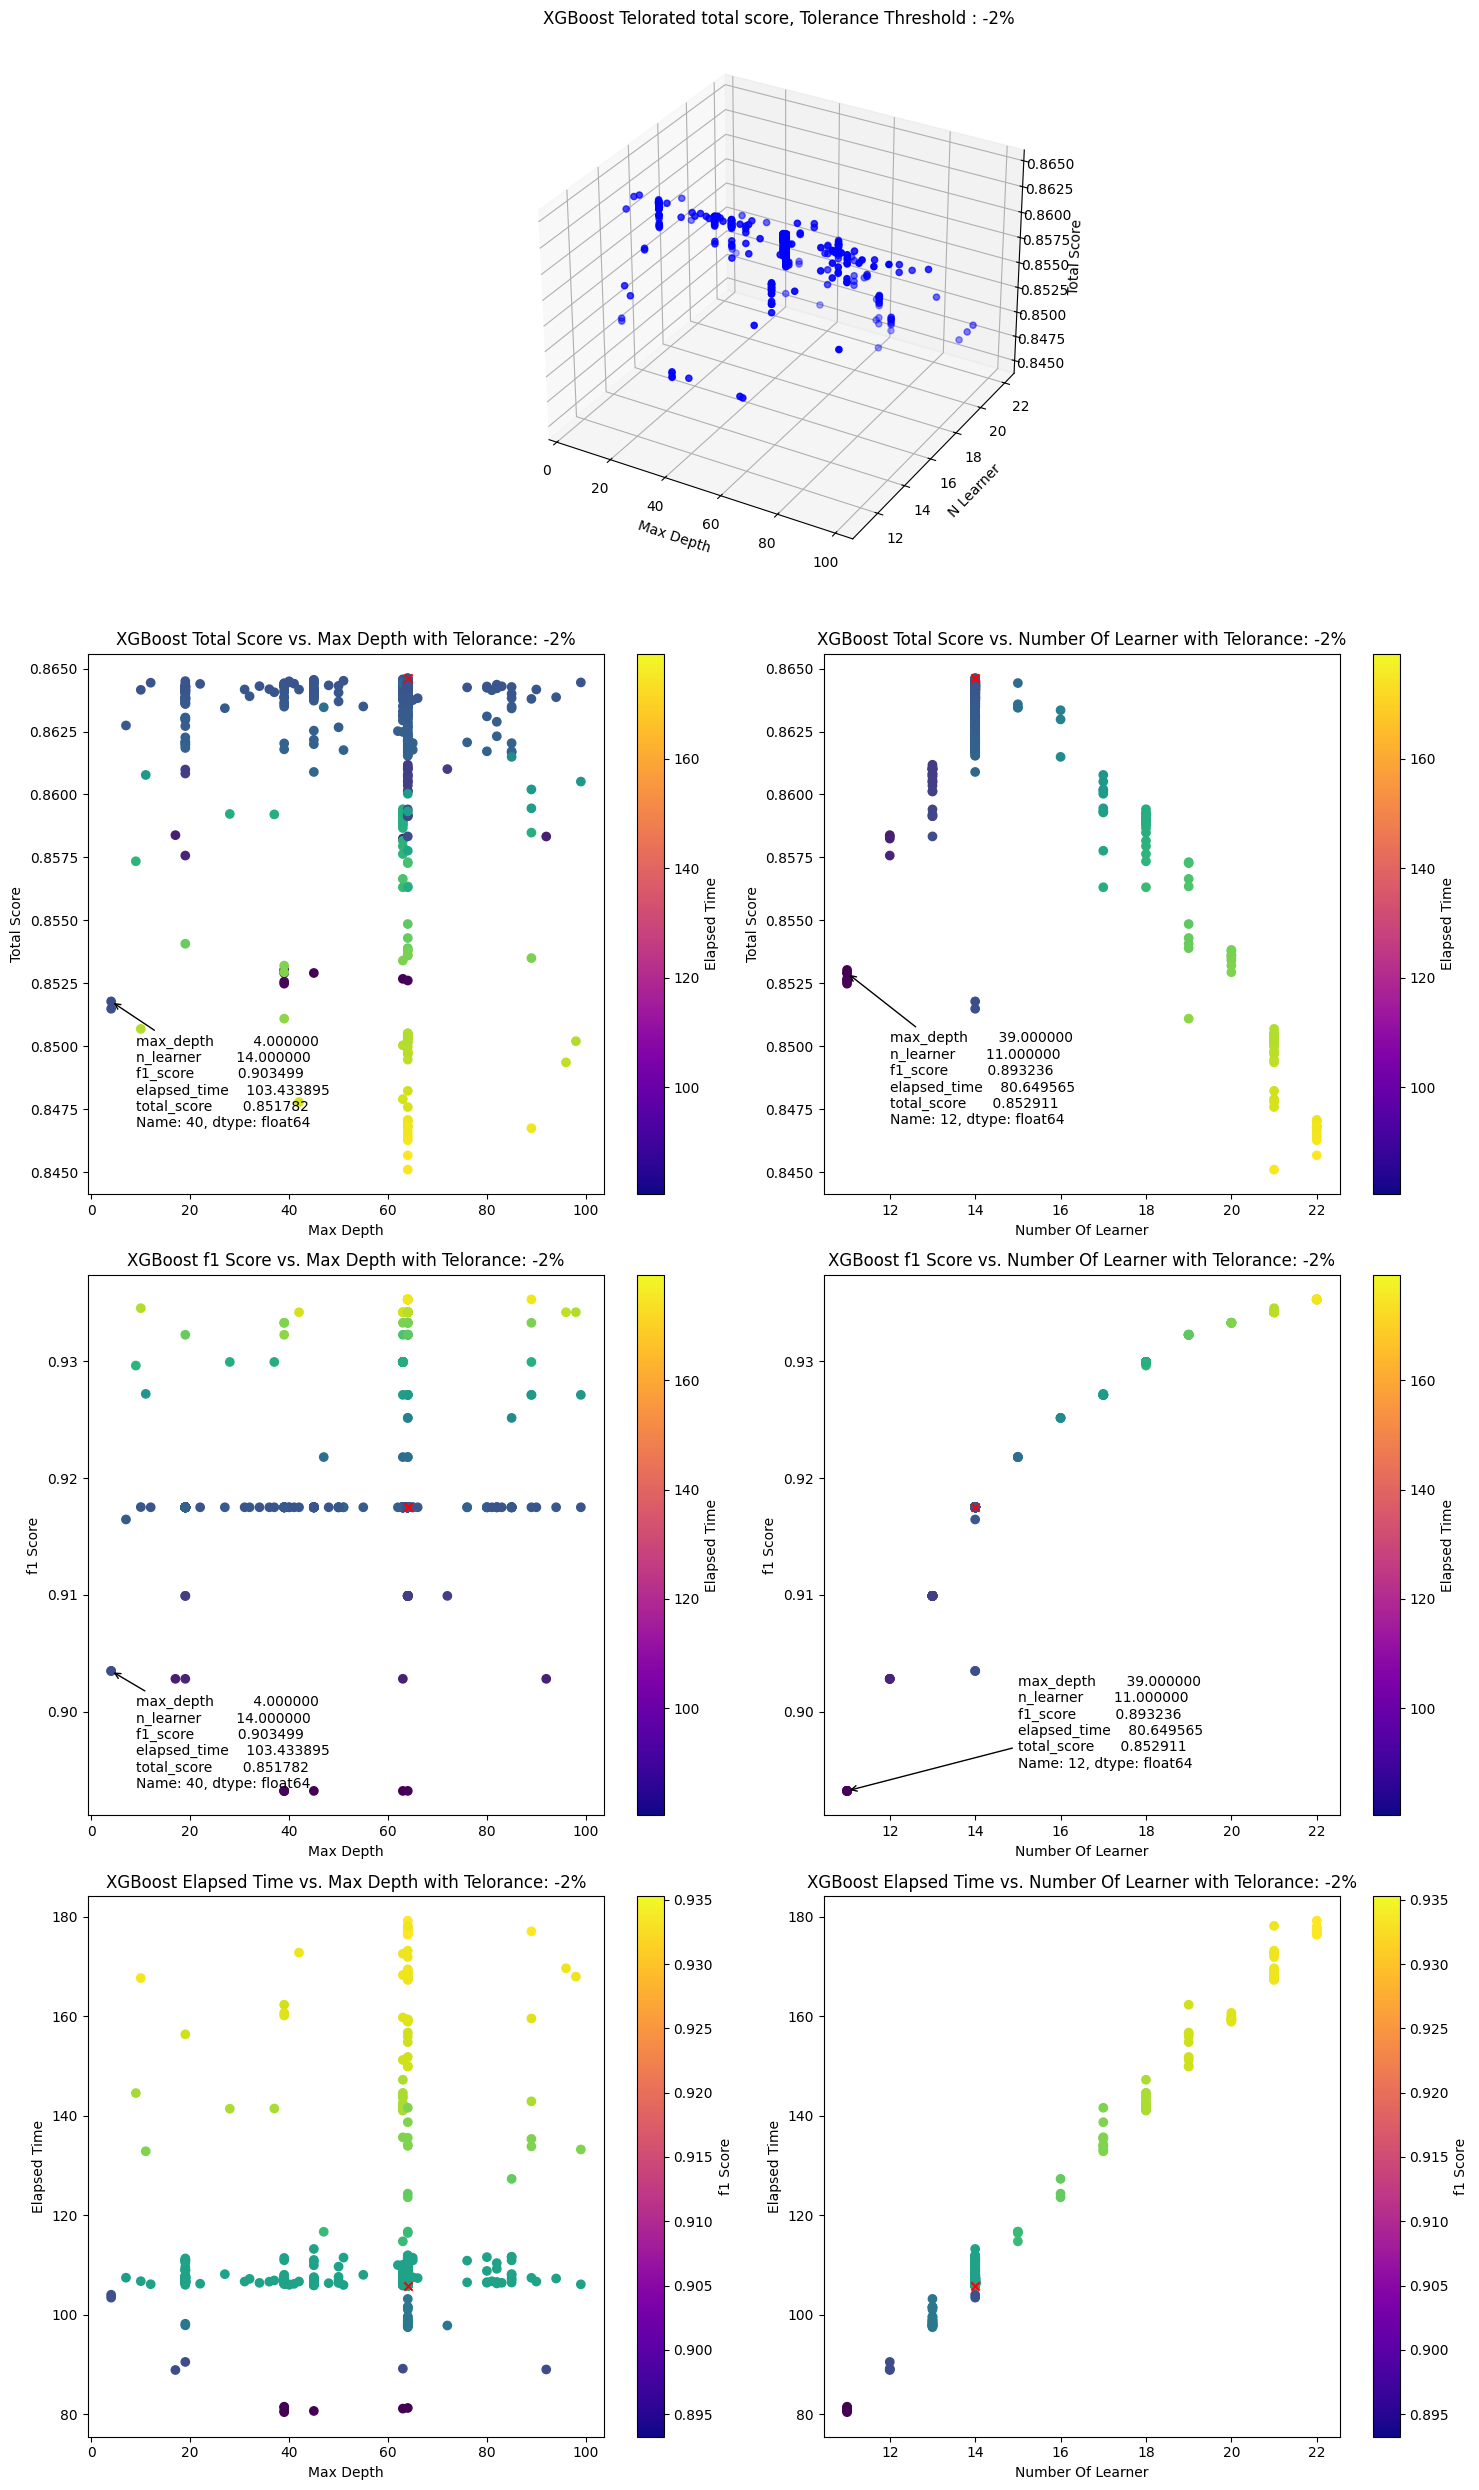

In [34]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+5, min_point_sub3['total_score']-0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+1, min_point_sub4['total_score']-0.006),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+5, min_point_sub5['f1_score']-0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+4, min_point_sub6['f1_score']+0.002),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')


# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -1%

In [35]:
Telorance = -1
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 64.0, 14.0, 0.8646199425056665
[82.0, 14.0, 0.9175065762594432, 109.23907470703124, 0.8628870389059274], -0.20% Tolerance
[47.0, 15.0, 0.9218031703446632, 116.68131637573242, 0.8634625121567969], -0.13% Tolerance
[11.0, 17.0, 0.9272123380865664, 132.87274432182312, 0.8607759659256549], -0.44% Tolerance
[92.0, 12.0, 0.902826421193288, 88.98980832099915, 0.8583315170327884], -0.73% Tolerance
[45.0, 14.0, 0.9175065762594432, 107.214839220047, 0.8638991566494196], -0.08% Tolerance
[99.0, 17.0, 0.9271269965802006, 133.22984552383423, 0.8605120738182834], -0.48% Tolerance
[17.0, 12.0, 0.902826421193288, 88.88234066963196, 0.8583852508584721], -0.72% Tolerance
[82.0, 14.0, 0.9175065762594432, 110.3872184753418, 0.8623129670217722], -0.27% Tolerance
[45.0, 14.0, 0.9175065762594432, 105.91449165344238, 0.8645493304327219], -0.01% Tolerance
[39.0, 14.0, 0.9175065762594432, 106.22766590118408, 0.8643927433088511], -0.03% Tolerance
[82.0, 14.0, 0.9175065762594432, 106.289645671844

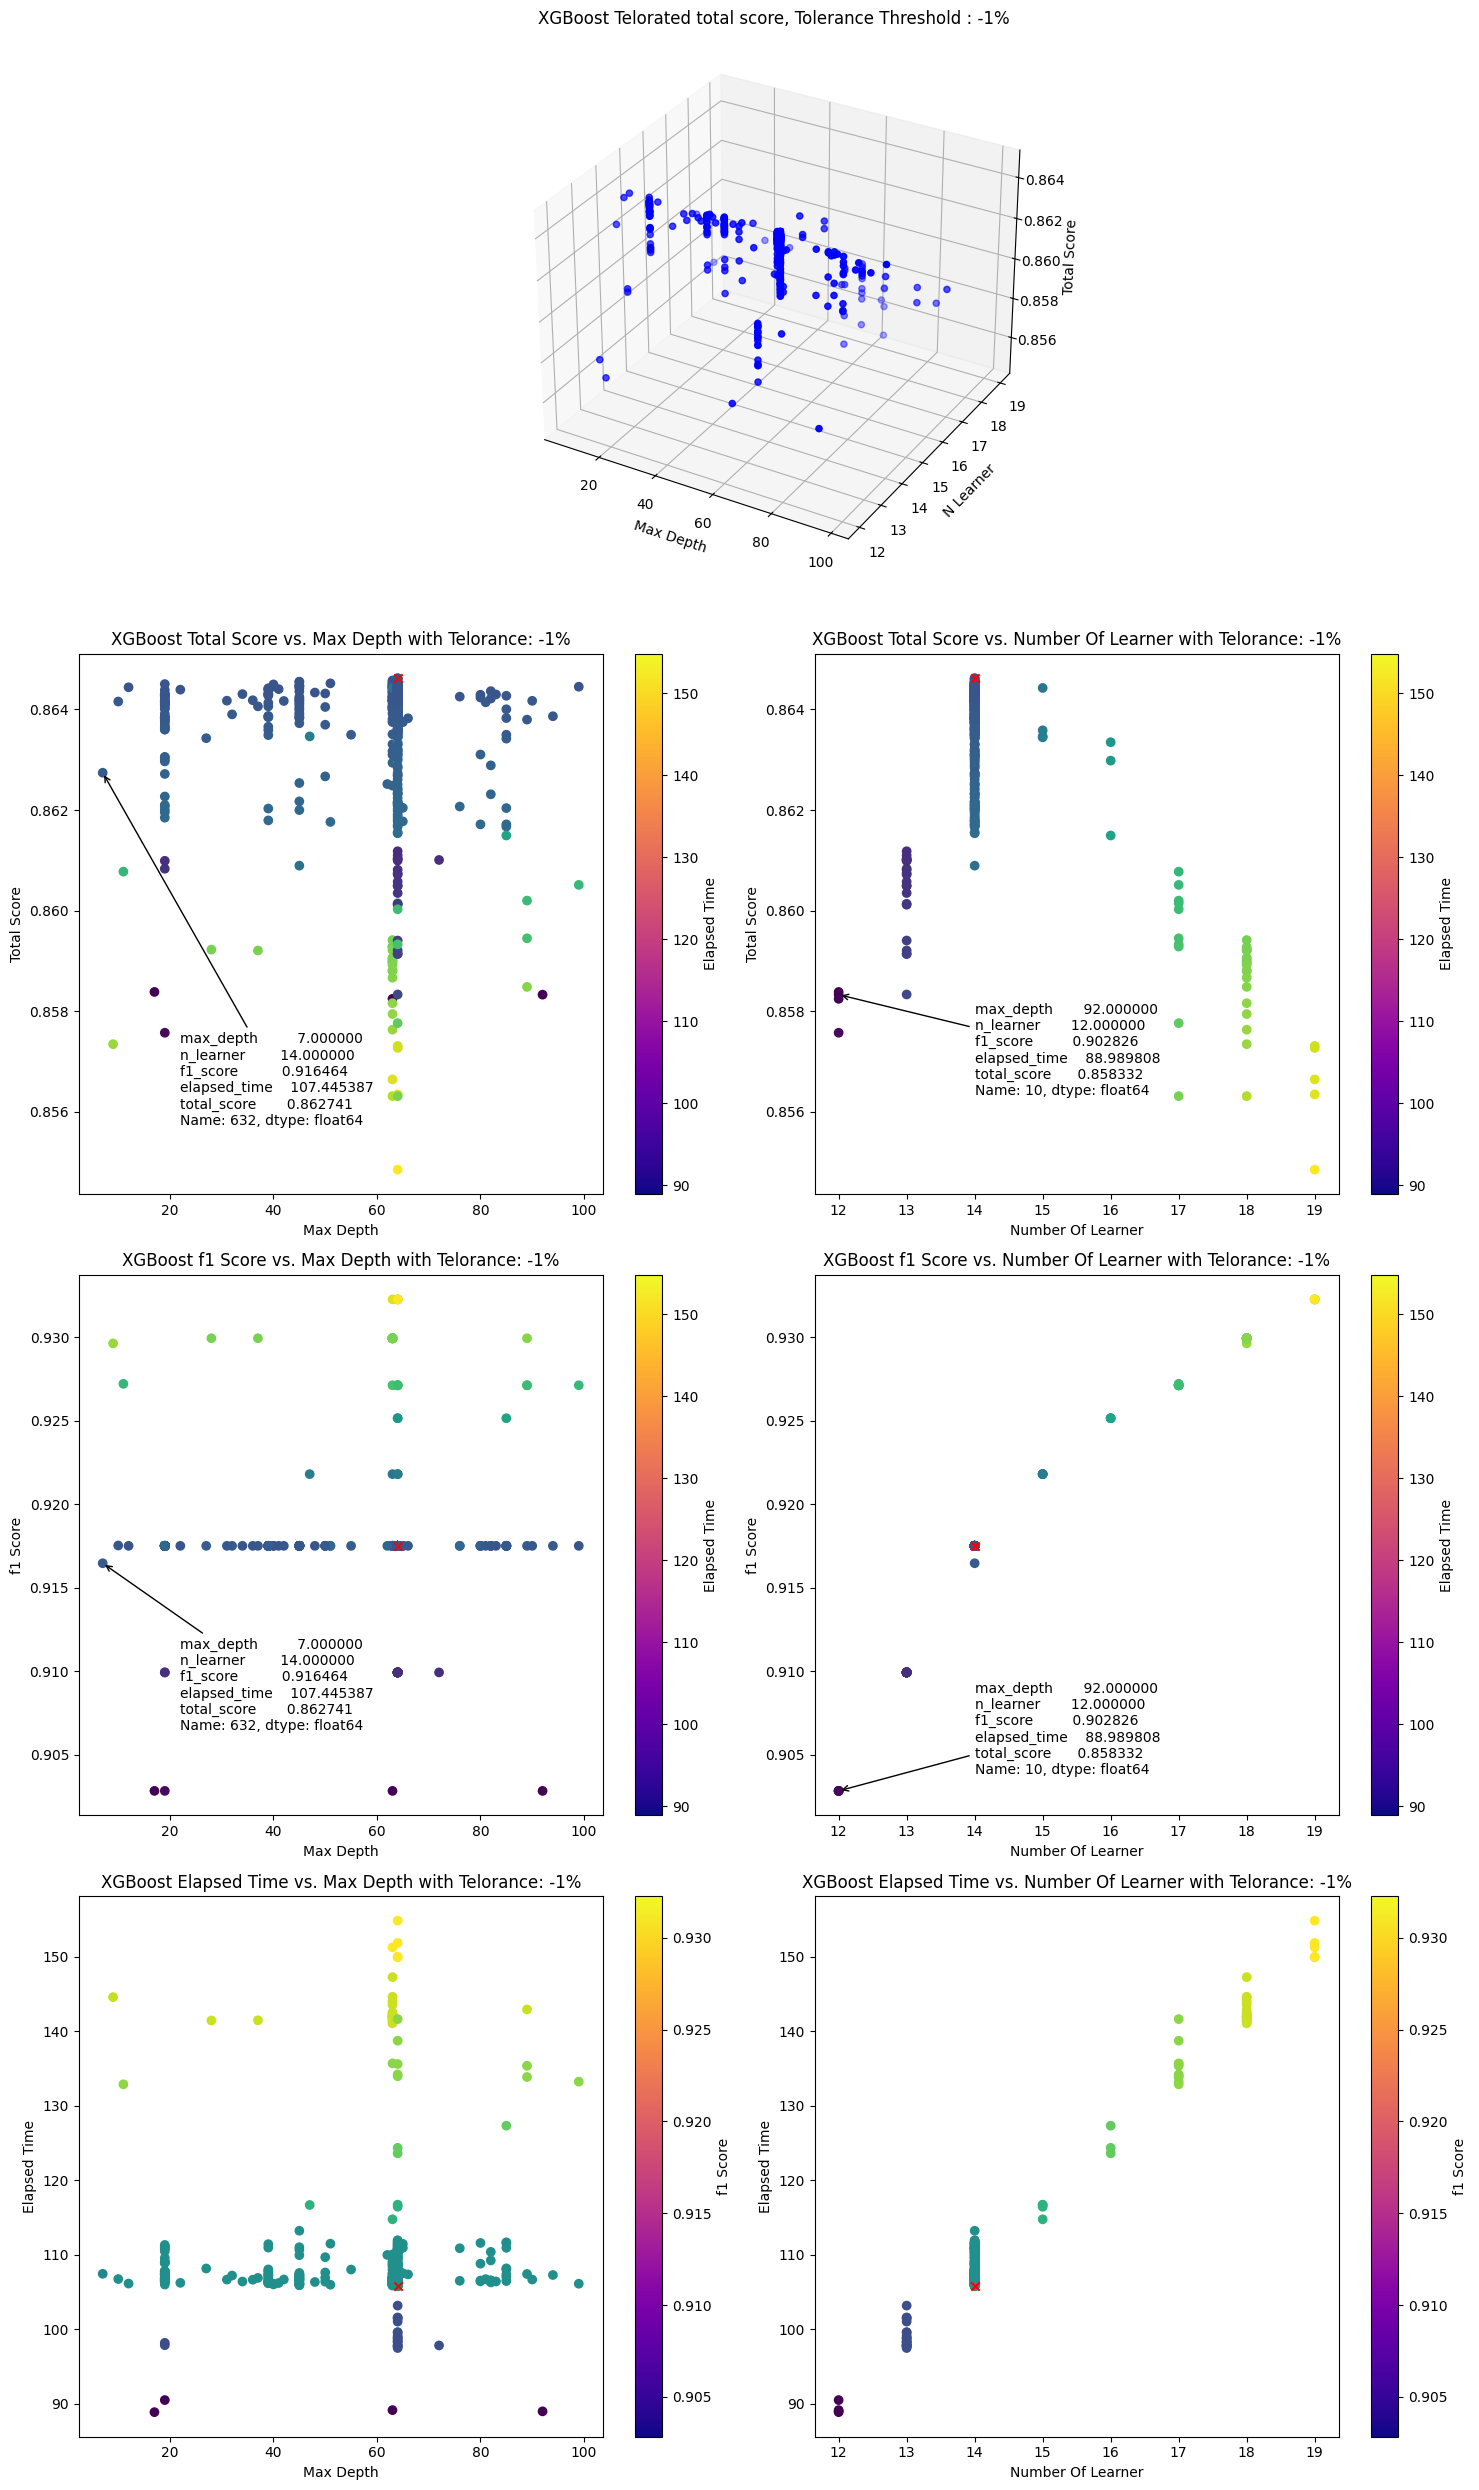

In [36]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+15, min_point_sub3['total_score']-0.007),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+2, min_point_sub4['total_score']-0.002),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+15, min_point_sub5['f1_score']-0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+2, min_point_sub6['f1_score']+0.001),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -0.5%

In [37]:
Telorance = -0.5
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 64.0, 14.0, 0.8646199425056665
[82.0, 14.0, 0.9175065762594432, 109.23907470703124, 0.8628870389059274], -0.20% Tolerance
[47.0, 15.0, 0.9218031703446632, 116.68131637573242, 0.8634625121567969], -0.13% Tolerance
[11.0, 17.0, 0.9272123380865664, 132.87274432182312, 0.8607759659256549], -0.44% Tolerance
[45.0, 14.0, 0.9175065762594432, 107.214839220047, 0.8638991566494196], -0.08% Tolerance
[99.0, 17.0, 0.9271269965802006, 133.22984552383423, 0.8605120738182834], -0.48% Tolerance
[82.0, 14.0, 0.9175065762594432, 110.3872184753418, 0.8623129670217722], -0.27% Tolerance
[45.0, 14.0, 0.9175065762594432, 105.91449165344238, 0.8645493304327219], -0.01% Tolerance
[39.0, 14.0, 0.9175065762594432, 106.22766590118408, 0.8643927433088511], -0.03% Tolerance
[82.0, 14.0, 0.9175065762594432, 106.28964567184448, 0.8643617534235208], -0.03% Tolerance
[72.0, 13.0, 0.9099244313561292, 97.833594083786, 0.8610076343142362], -0.42% Tolerance
[63.0, 14.0, 0.9175065762594432, 107.18318819999

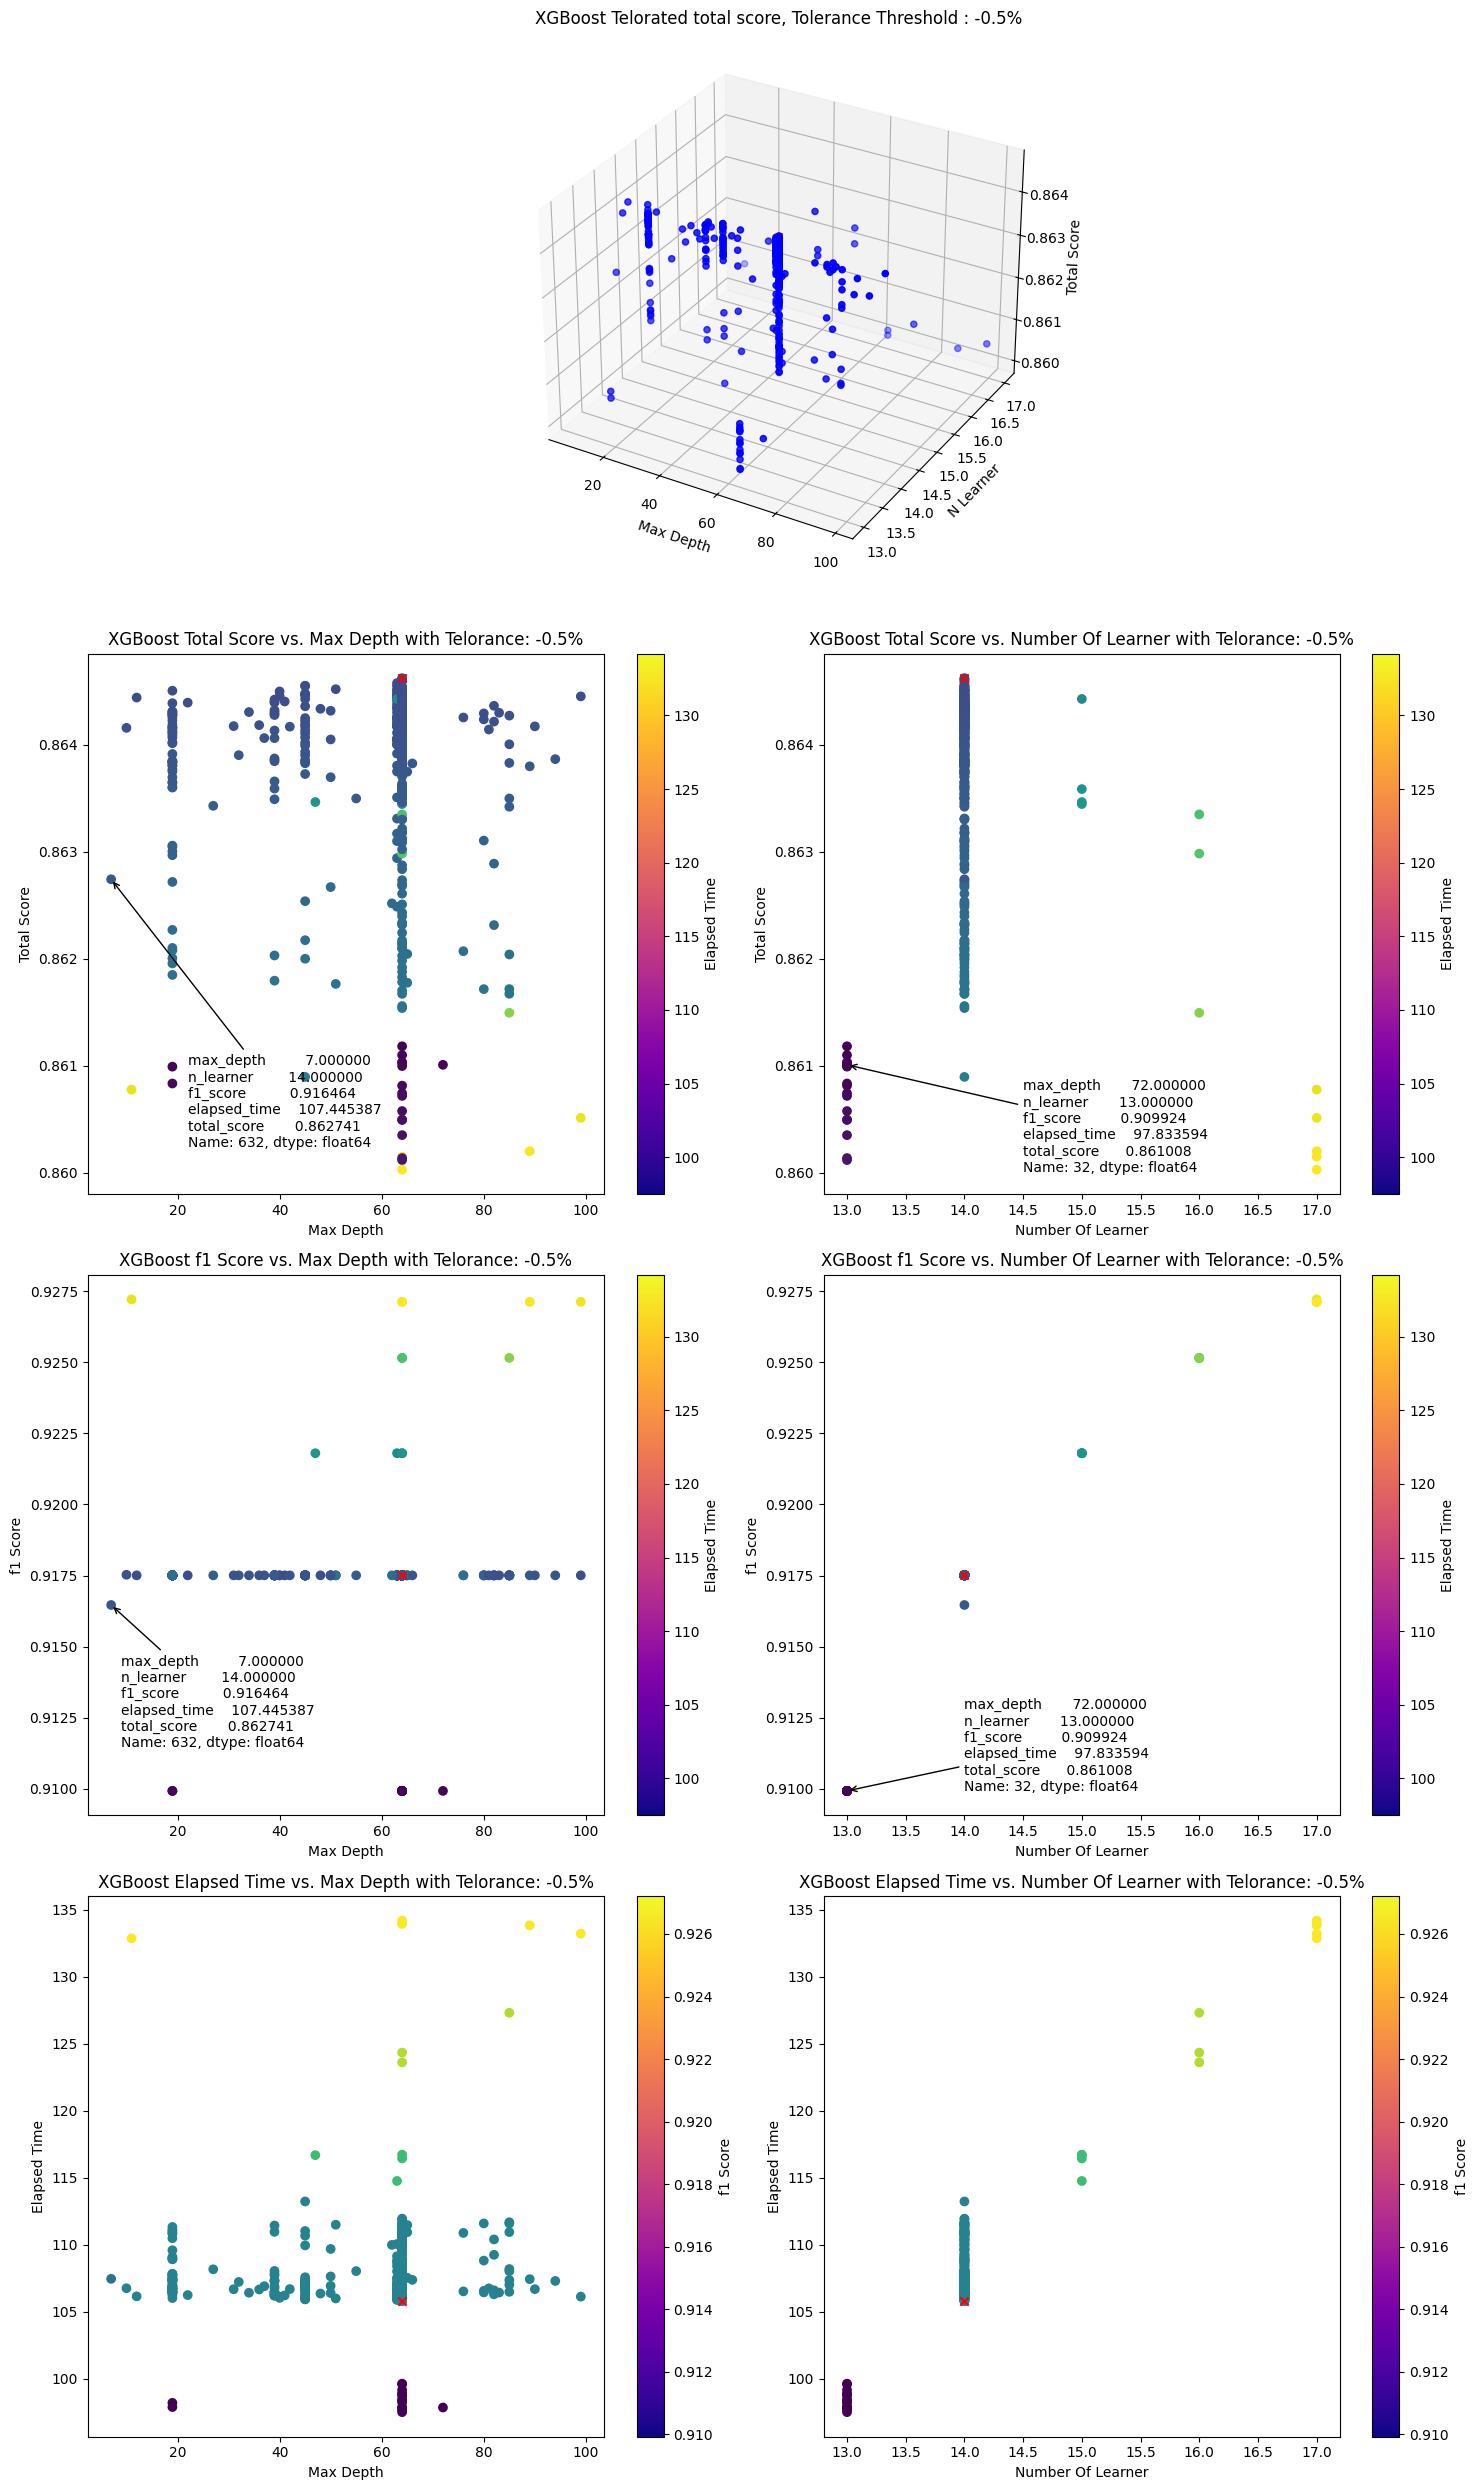

In [38]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)
# Display color bar properly
cbar.set_label('Elapsed Time')

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+15, min_point_sub3['total_score']-0.0025),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+1.5, min_point_sub4['total_score']-0.001),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')


min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+2, min_point_sub5['f1_score']-0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+1, min_point_sub6['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Telorance = -0.1%

In [39]:
Telorance = -0.1
txttel = f"{str(Telorance)}%"
# Find the row with the maximum 'total_score'
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Print Max Total Score information
print(f"Max Total Score: {max_total_score_row['max_depth']}, {max_total_score_row['n_learner']}, {max_total_score_row['total_score']}")


# Calculate the tolerance threshold (maximum_total_score - 0.02)
tolerance_threshold = max_total_score_row['total_score'] + Telorance * 0.01

# Find rows with total_score within the tolerance range
rows_within_tolerance = dfp[dfp['total_score'] >= tolerance_threshold]

# Iterate through each row within tolerance and calculate tolerance percentage
for index, row in rows_within_tolerance.iterrows():
    tolerance_percentage = ((row['total_score'] - max_total_score_row['total_score']) / max_total_score_row['total_score']) * 100
    print(f"{row[['max_depth', 'n_learner', 'f1_score', 'elapsed_time', 'total_score']].tolist()}, {tolerance_percentage:.2f}% Tolerance")

Max Total Score: 64.0, 14.0, 0.8646199425056665
[45.0, 14.0, 0.9175065762594432, 107.214839220047, 0.8638991566494196], -0.08% Tolerance
[45.0, 14.0, 0.9175065762594432, 105.91449165344238, 0.8645493304327219], -0.01% Tolerance
[39.0, 14.0, 0.9175065762594432, 106.22766590118408, 0.8643927433088511], -0.03% Tolerance
[82.0, 14.0, 0.9175065762594432, 106.28964567184448, 0.8643617534235208], -0.03% Tolerance
[63.0, 14.0, 0.9175065762594432, 107.18318819999696, 0.8639149821594446], -0.08% Tolerance
[63.0, 14.0, 0.9175065762594432, 106.16031861305235, 0.8644264169529169], -0.02% Tolerance
[64.0, 14.0, 0.9175065762594432, 106.01470422744752, 0.8644992241457193], -0.01% Tolerance
[82.0, 14.0, 0.9175065762594432, 106.58477473258972, 0.8642141888931483], -0.05% Tolerance
[45.0, 14.0, 0.9175065762594432, 107.36325812339784, 0.8638249471977442], -0.09% Tolerance
[45.0, 14.0, 0.9175065762594432, 106.08404517173769, 0.8644645536735742], -0.02% Tolerance
[64.0, 14.0, 0.9175065762594432, 106.2251777

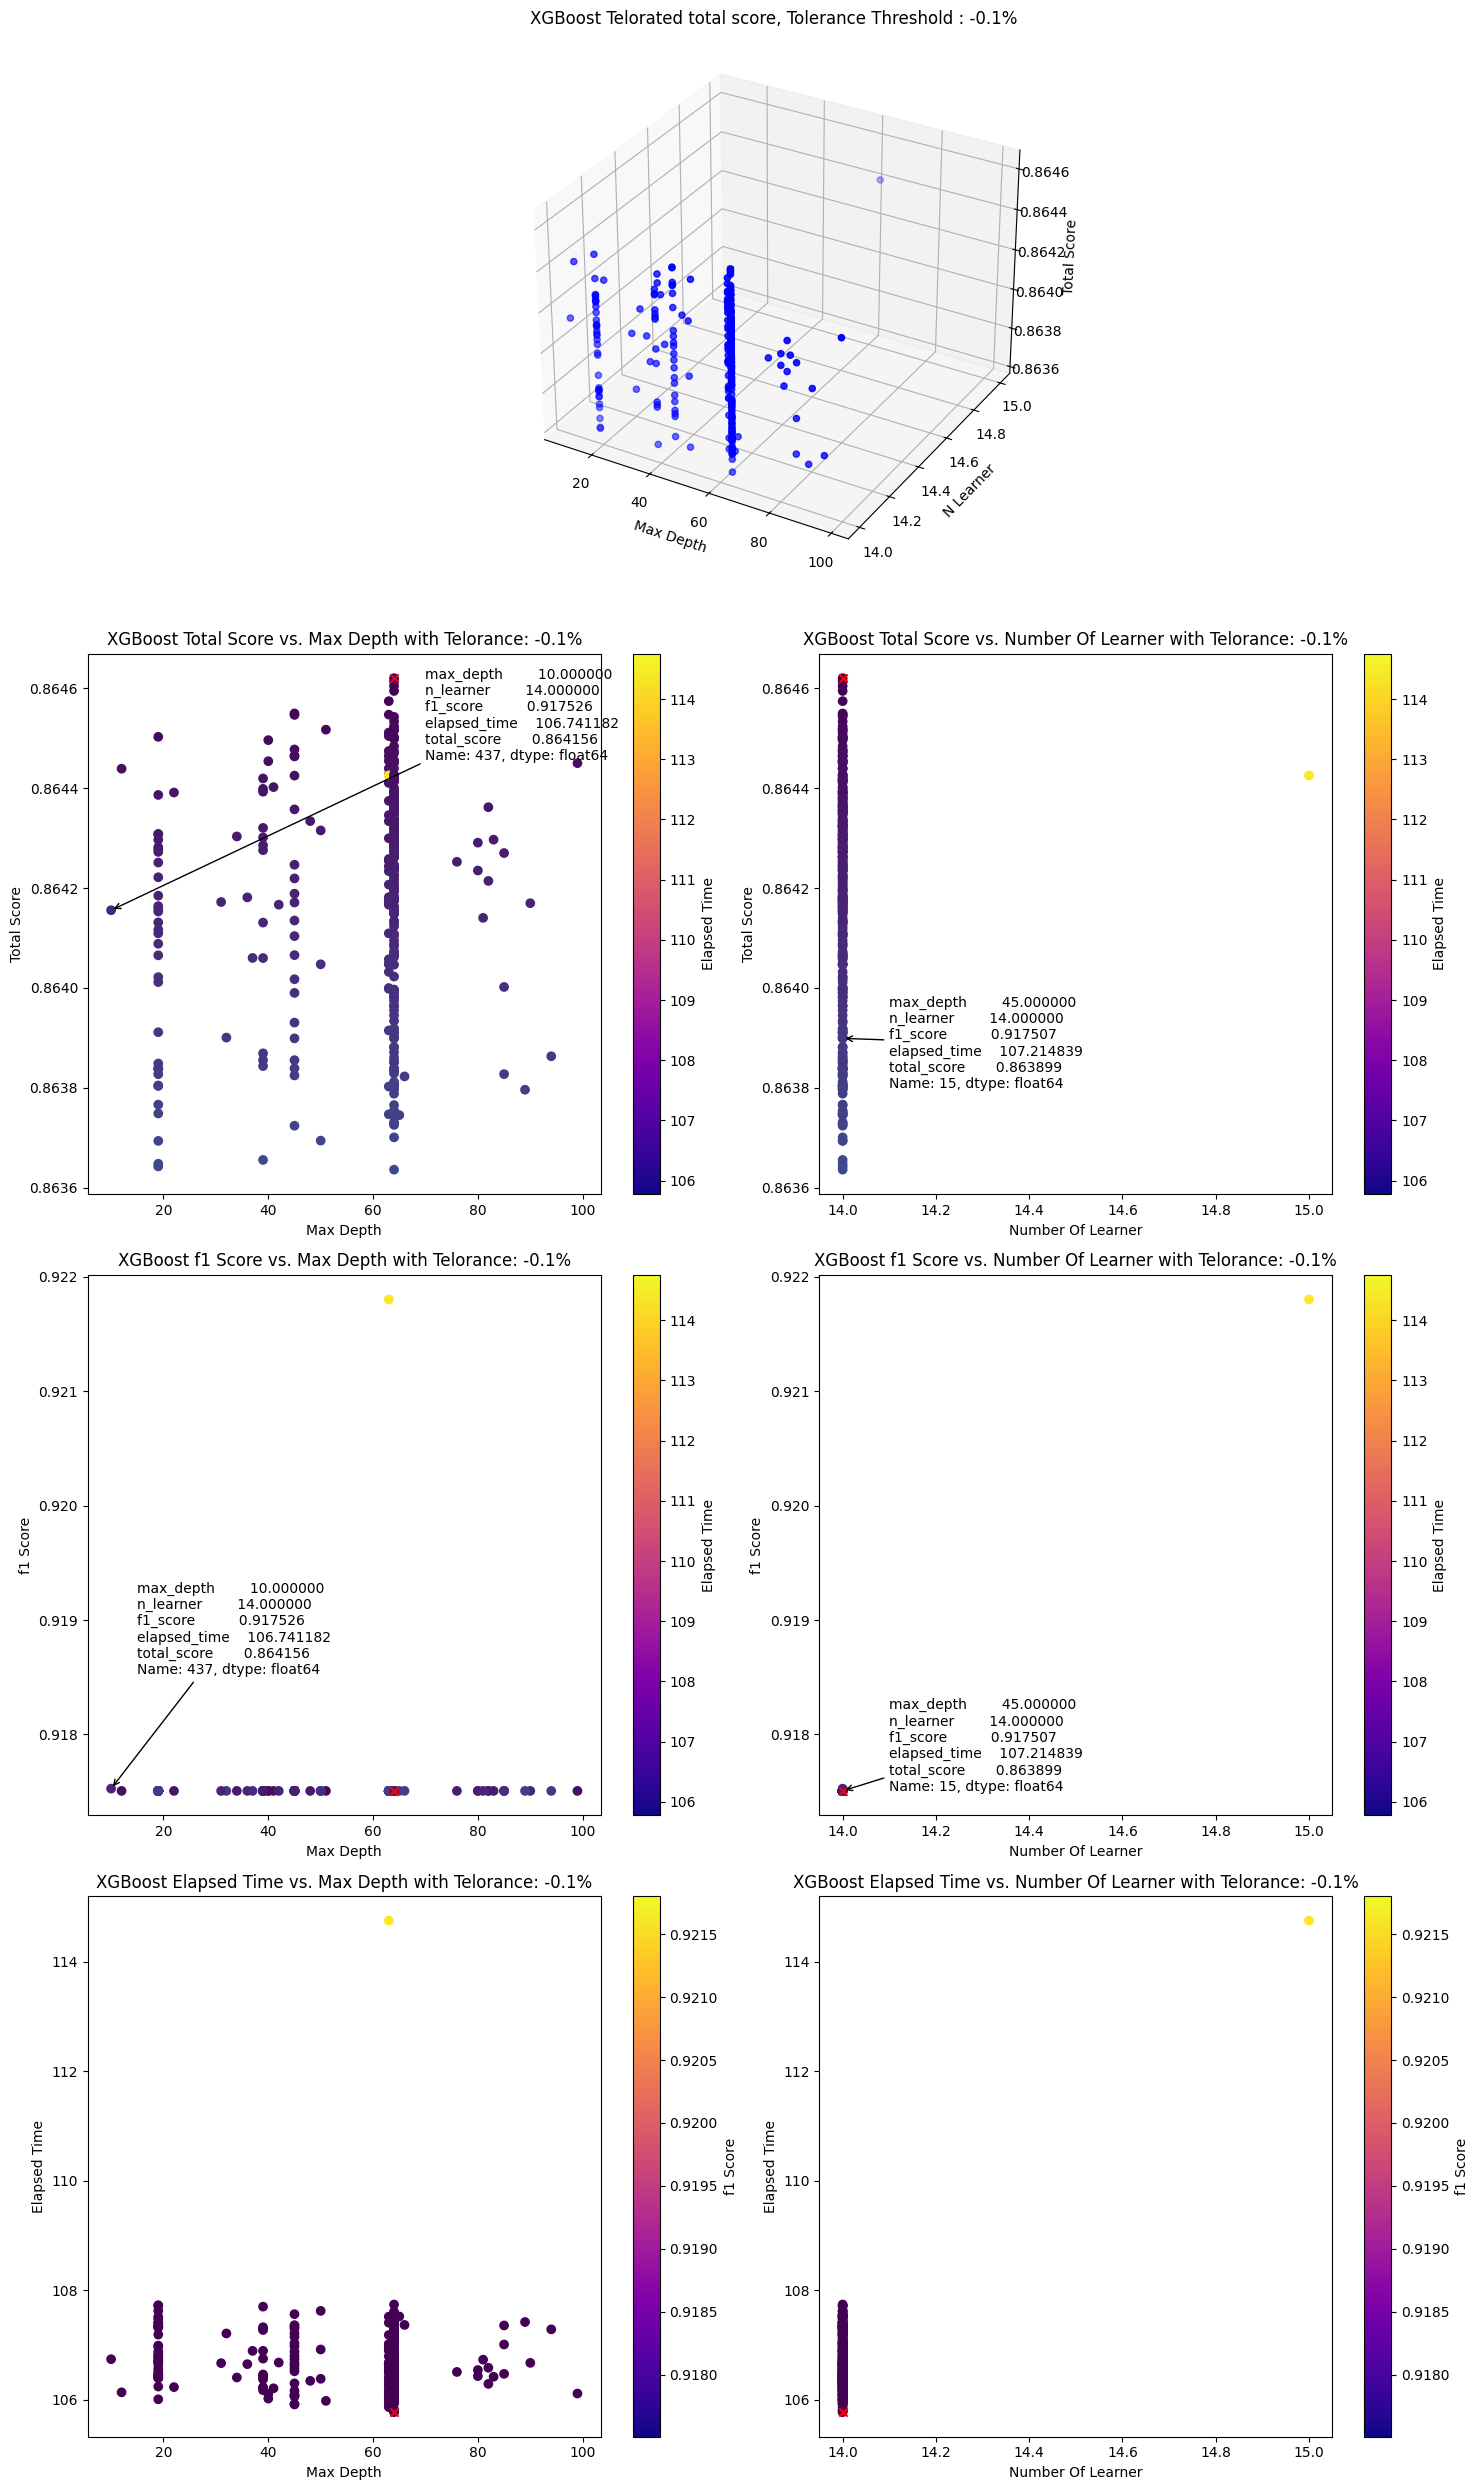

In [40]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 25))
cmap = cm.plasma

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, projection='3d')
ax1.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c='b', marker='o', label='Within Tolerance')
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N Learner')
ax1.set_zlabel('Total Score')
ax1.set_title(f'{txtmodel} Telorated total score, Tolerance Threshold : {txttel}')

# Subplot 3
ax3 = plt.subplot2grid((4, 2), (1, 0))
color_ax3 = rows_within_tolerance['elapsed_time']
ax3.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['total_score'], c=color_ax3, marker='o', label='Within Tolerance')
ax3.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Total Score')
ax3.set_title(f'{txtmodel} Total Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax3)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax3)

# Find the point with the minimum max_depth using .iloc[]
min_point_sub3 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax3.annotate(str(min_point_sub3), xy=(min_point_sub3['max_depth'], min_point_sub3['total_score']),
             xytext=(min_point_sub3['max_depth']+60, min_point_sub3['total_score']+0.0003),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Display color bar properly
cbar.set_label('Elapsed Time')


# Subplot 4
ax4 = plt.subplot2grid((4, 2), (1, 1))
color_ax4 = rows_within_tolerance['elapsed_time']
ax4.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['total_score'], c=color_ax4, marker='o', label='Within Tolerance')
ax4.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Within Tolerance')
ax4.set_xlabel('Number Of Learner')
ax4.set_ylabel('Total Score')
ax4.set_title(f'{txtmodel} Total Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax4)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax4)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub4 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax4.annotate(str(min_point_sub4), 
             xy=(min_point_sub4['n_learner'], min_point_sub4['total_score']),
             xytext=(min_point_sub4['n_learner']+0.1, min_point_sub4['total_score']-0.0001),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 5
ax5 = plt.subplot2grid((4, 2), (2, 0))
color_ax5 = rows_within_tolerance['elapsed_time']
ax5.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['f1_score'], c=color_ax5, marker='o', label='Within Tolerance')
ax5.scatter(max_total_score_row['max_depth'], max_total_score_row['f1_score'], c='r', marker='x', label='Max Total Score')
ax5.set_xlabel('Max Depth')
ax5.set_ylabel('f1 Score')
ax5.set_title(f'{txtmodel} f1 Score vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax5)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax5)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub5 = rows_within_tolerance.loc[(rows_within_tolerance['max_depth'].idxmin())]

# Label the point with the minimum max_depth
ax5.annotate(str(min_point_sub5), 
             xy=(min_point_sub5['max_depth'], min_point_sub5['f1_score']),
             xytext=(min_point_sub5['max_depth']+5, min_point_sub5['f1_score']+0.001),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 6
ax6 = plt.subplot2grid((4, 2), (2, 1))
color_ax6 = rows_within_tolerance['elapsed_time']
ax6.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['f1_score'], c=color_ax6, marker='o', label='Within Tolerance')
ax6.scatter(max_total_score_row['n_learner'], max_total_score_row['f1_score'], c='r', marker='x', label='Within Tolerance')
ax6.set_xlabel('Number Of Learner')
ax6.set_ylabel('f1 Score')
ax6.set_title(f'{txtmodel} f1 Score vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax6)
cbar = plt.colorbar(sm, label='Elapsed Time', ax=ax6)
# Display color bar properly
cbar.set_label('Elapsed Time')

min_point_sub6 = rows_within_tolerance.loc[(rows_within_tolerance['n_learner'].idxmin())]

# Label the point with the minimum max_depth
ax6.annotate(str(min_point_sub6), 
             xy=(min_point_sub6['n_learner'], min_point_sub6['f1_score']),
             xytext=(min_point_sub6['n_learner']+0.1, min_point_sub6['f1_score']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 7
ax7 = plt.subplot2grid((4, 2), (3, 0))
color_ax7 = rows_within_tolerance['f1_score']
ax7.scatter(rows_within_tolerance['max_depth'], rows_within_tolerance['elapsed_time'], c=color_ax7, marker='o', label='Within Tolerance')
ax7.scatter(max_total_score_row['max_depth'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')
ax7.set_xlabel('Max Depth')
ax7.set_ylabel('Elapsed Time')
ax7.set_title(f'{txtmodel} Elapsed Time vs. Max Depth with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax7)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax7)
# Display color bar properly
cbar.set_label('f1 Score')

# Subplot 8
ax8 = plt.subplot2grid((4, 2), (3, 1))
color_ax8 = rows_within_tolerance['f1_score']
ax8.scatter(rows_within_tolerance['n_learner'], rows_within_tolerance['elapsed_time'], c=color_ax8, marker='o', label='Within Tolerance')
ax8.scatter(max_total_score_row['n_learner'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Within Tolerance')
ax8.set_xlabel('Number Of Learner')
ax8.set_ylabel('Elapsed Time')
ax8.set_title(f'{txtmodel} Elapsed Time vs. Number Of Learner with Telorance: {txttel}')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(color_ax8)
cbar = plt.colorbar(sm, label='f1 Score', ax=ax8)
# Display color bar properly
cbar.set_label('f1 Score')

# Empty Subplot (Placeholder)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax2.axis('off')  # Turn off axis for the empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### f1 score vs. Elapsed time

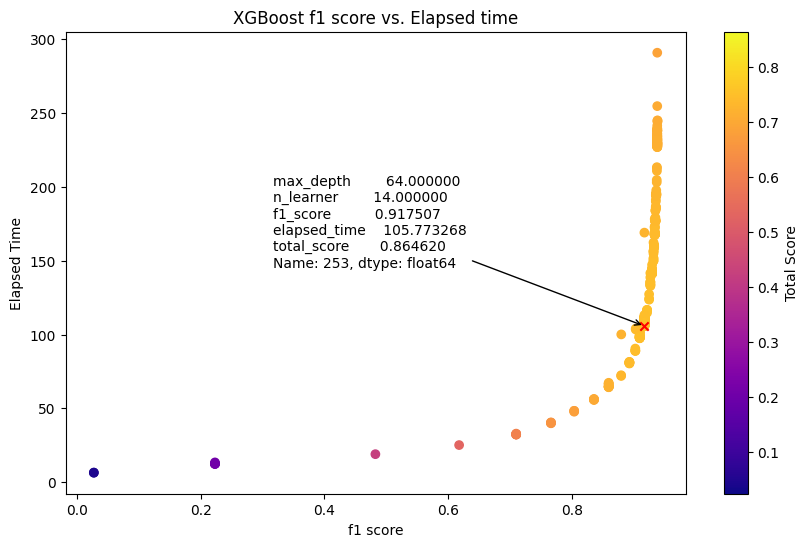

In [41]:
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score'] 


# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 6))
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=2)
ax1.scatter(dfp['f1_score'], dfp['elapsed_time'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax1.scatter(max_total_score_row['f1_score'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='Total Score', ax=ax1)  # Fixed typo: 'plt.gca()' to 'ax1'

ax1.set_xlabel('f1 score')
ax1.set_ylabel('Elapsed Time')
ax1.set_title(f'{txtmodel} f1 score vs. Elapsed time')


# Label the point with the minimum max_depth
ax1.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['f1_score'], max_total_score_row['elapsed_time']),
             xytext=(max_total_score_row['f1_score']-0.6, max_total_score_row['elapsed_time']+40),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Show the plot
plt.show()